In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
!pip install -r requirements.txt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pickle
import gensim
data = pickle.load(open("image_vectors.p", "rb"))
word_vector = pickle.load(open("bert_embeddings.p", "rb"))
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [4]:
from BertEmbedding import EmbeddingCreator
emb = EmbeddingCreator()

768
11840
11840
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0002_55.jpg
Black_Footed_Albatross_0003_796136.jpg
Black_Footed_Albatross_0005_796090.jpg
Black_Footed_Albatross_0006_796065.jpg
Black_Footed_Albatross_0007_796138.jpg
Black_Footed_Albatross_0008_796083.jpg
Black_Footed_Albatross_0009_34.jpg


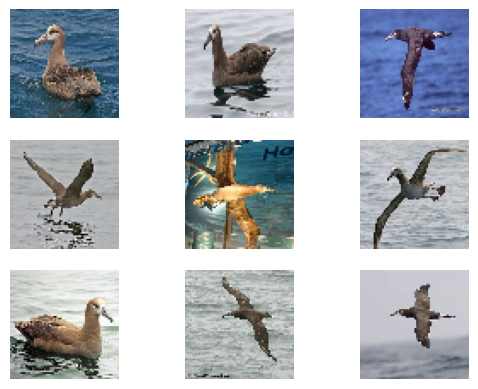

In [5]:

import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import expand_dims
from random import randint, choice

def random_flip(image):
    image = tf.image.flip_left_right(image)
    return image.numpy()

def random_jitter(image):
    image = expand_dims(image, 0) #add additional dimension necessary for zooming
    image = image_augmentation_generator.flow(image, batch_size=1)
    result = image[0].reshape(image[0].shape[1:]) #remove additional dimension (1, 64, 64, 3) to (64, 64, 3)
    return result

image_augmentation_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.8, 1.0]) # random zoom proves to be helpful in capturing more details https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

n = 227
image_embeddings = []
captions = []
labels = []
for i, k in enumerate(data.keys()):
    image_embeddings.append(data[k])
    captions.append(word_vector[k])
    #print(word_vector[k])
    labels.append(k)
    #print(k)
    if i % n == 0:
        image_embeddings.append(random_jitter(data[k]))
        captions.append(word_vector[k])
        labels.append(k)

print(len(word_vector[k]))
print(len(captions))
print(len(image_embeddings))

pyplot.axis('off')
slcie = image_embeddings[40:50]
for i in range(9):
    pyplot.subplot(3, 3, i+1)
    pyplot.imshow(array_to_img(slcie[i]))
    print(labels[i])
    pyplot.axis('off')

pyplot.show()

In [6]:
import numpy as np

def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]


In [7]:
choice(model.index_to_key)

'John_Styll'

In [8]:
len(model[choice(model.index_to_key)])

300

In [9]:
result_array = np.empty((0, 300))

In [10]:
choice(model.index_to_key)

'salmon_redds'

In [11]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(1):
     result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [12]:
import tensorflow_hub as hub
import tensorflow_text
preprocess_url = 'bert_en_uncased_preprocess_3'
encoder_url = 'bert_en_uncased_L-12_H-768_A-12_4'
bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

In [13]:
def create_sent_vector(sent):
    sent = [sent]
    text_preprocessed = bert_preprocess_model(sent)
    final = bert_model(text_preprocessed)
    return final['pooled_output'].numpy()

In [14]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(1):
     result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [15]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 768))
    for i in range(1):
     result_array = np.append(result_array, lbs[randint(0,11830)], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [16]:
def generate_random_vectors(n_samples):  
    vectorized_random_captions = []
    #print(n_samples)
    for n in range(n_samples): #batch size
        rnd = randint(8, 25) # number of tokens in a sentence
        result_array = np.empty((0, 768)) #embedding size (will change)
        rand_sentence = []
        s = ''
        for i in range(rnd):
            if (i==rnd-1):
                s = s + choice(model.index_to_key)
                continue
            s = s + choice(model.index_to_key) + ' '
            #rand_sentence.append(choice(model.index_to_key))
            #result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0) #embedding vector for the sentence
        result_array = np.append(result_array, emb.createCustomEmbeddings(s),axis =0 )
        #print(result_array.shape)
        rand_sentence.append(s)
        #result_array = np.append(result_array, rand_sentence, axis=0)
        vectorized_random_captions.append(result_array.astype('float32')) # final list

    return np.array(vectorized_random_captions).reshape(n_samples,768)

In [17]:
#lbs[1].reshape(1,768)

In [18]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 768))
    for i in range(rnd):
     result_array = np.append(result_array, lbs[randint(0,11830)].reshape(1,768), axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [19]:
#lola = generate_random_vectors(32)

In [20]:
#type(lola)

In [21]:
#lola.shape

In [22]:
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.utils import plot_model

In [23]:


# Discriminator model
def define_discriminator():
    word_vector_dim = 768
    dropout_prob = 0.4

    in_label = layers.Input(shape=(768,))
    li = layers.BatchNormalization()(in_label)
    li = layers.Dense(300)(li)
    
    n_nodes = 3 * 64 * 64
    li = layers.Dense(n_nodes)(li)
    li = layers.Reshape((64, 64, 3))(li)

    dis_input = layers.Input(shape=(64, 64, 3))

    merge = layers.Concatenate()([dis_input, li])

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(merge)
    discriminator = layers.LeakyReLU(0.2)(discriminator)
    discriminator = layers.GaussianNoise(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU()(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Flatten()(discriminator)

    discriminator = layers.Dense(1024)(discriminator)

    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Dense(1)(discriminator)

    discriminator_model = Model(inputs=[dis_input, in_label], outputs=discriminator)

    #discriminator_model.summary()

    return discriminator_model


def resnet_block(model, kernel_size, filters, strides):
    gen = model
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen, model])
    return model


# Generator model
def define_generator():
    kernel_init = tf.random_normal_initializer(stddev=0.02)
    batch_init = tf.random_normal_initializer(1., 0.02)

    random_input = layers.Input(shape=(100,))
    text_input1 = layers.Input(shape=(768,))
    text_layer1 = layers.BatchNormalization()(text_input1)
    text_layer1 = layers.Dense(300)(text_layer1)
    
    text_layer2 = layers.Dense(8192)(text_layer1)
    text_layer3 = layers.Reshape((8, 8, 128))(text_layer2)

    n_nodes = 128 * 8 * 8
    gen_input_dense = layers.Dense(n_nodes)(random_input)
    generator = layers.Reshape((8, 8, 128))(gen_input_dense)

    merge = layers.Concatenate()([generator, text_layer3])

    model = layers.Conv2D(filters=64, kernel_size=9, strides=1, padding="same")(merge)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)

    gen_model = model

    for _ in range(4):
      model = resnet_block(model, 3, 64, 1)

    model = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen_model, model])

    model = layers.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2D(3, (3, 3), padding='same', activation='tanh')(model)

    generator_model = Model(inputs=[random_input, text_input1], outputs=model)

    #generator_model.summary()

    return generator_model

In [24]:
g_plot = define_generator()

In [25]:
from tensorflow.keras.utils import plot_model

In [26]:
!apt install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [27]:
!pip install pydot
!pip install graphviz
!pip install pydotplus

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [28]:
import pydot
import pydotplus
import graphviz


In [29]:
disc_plot = define_discriminator()

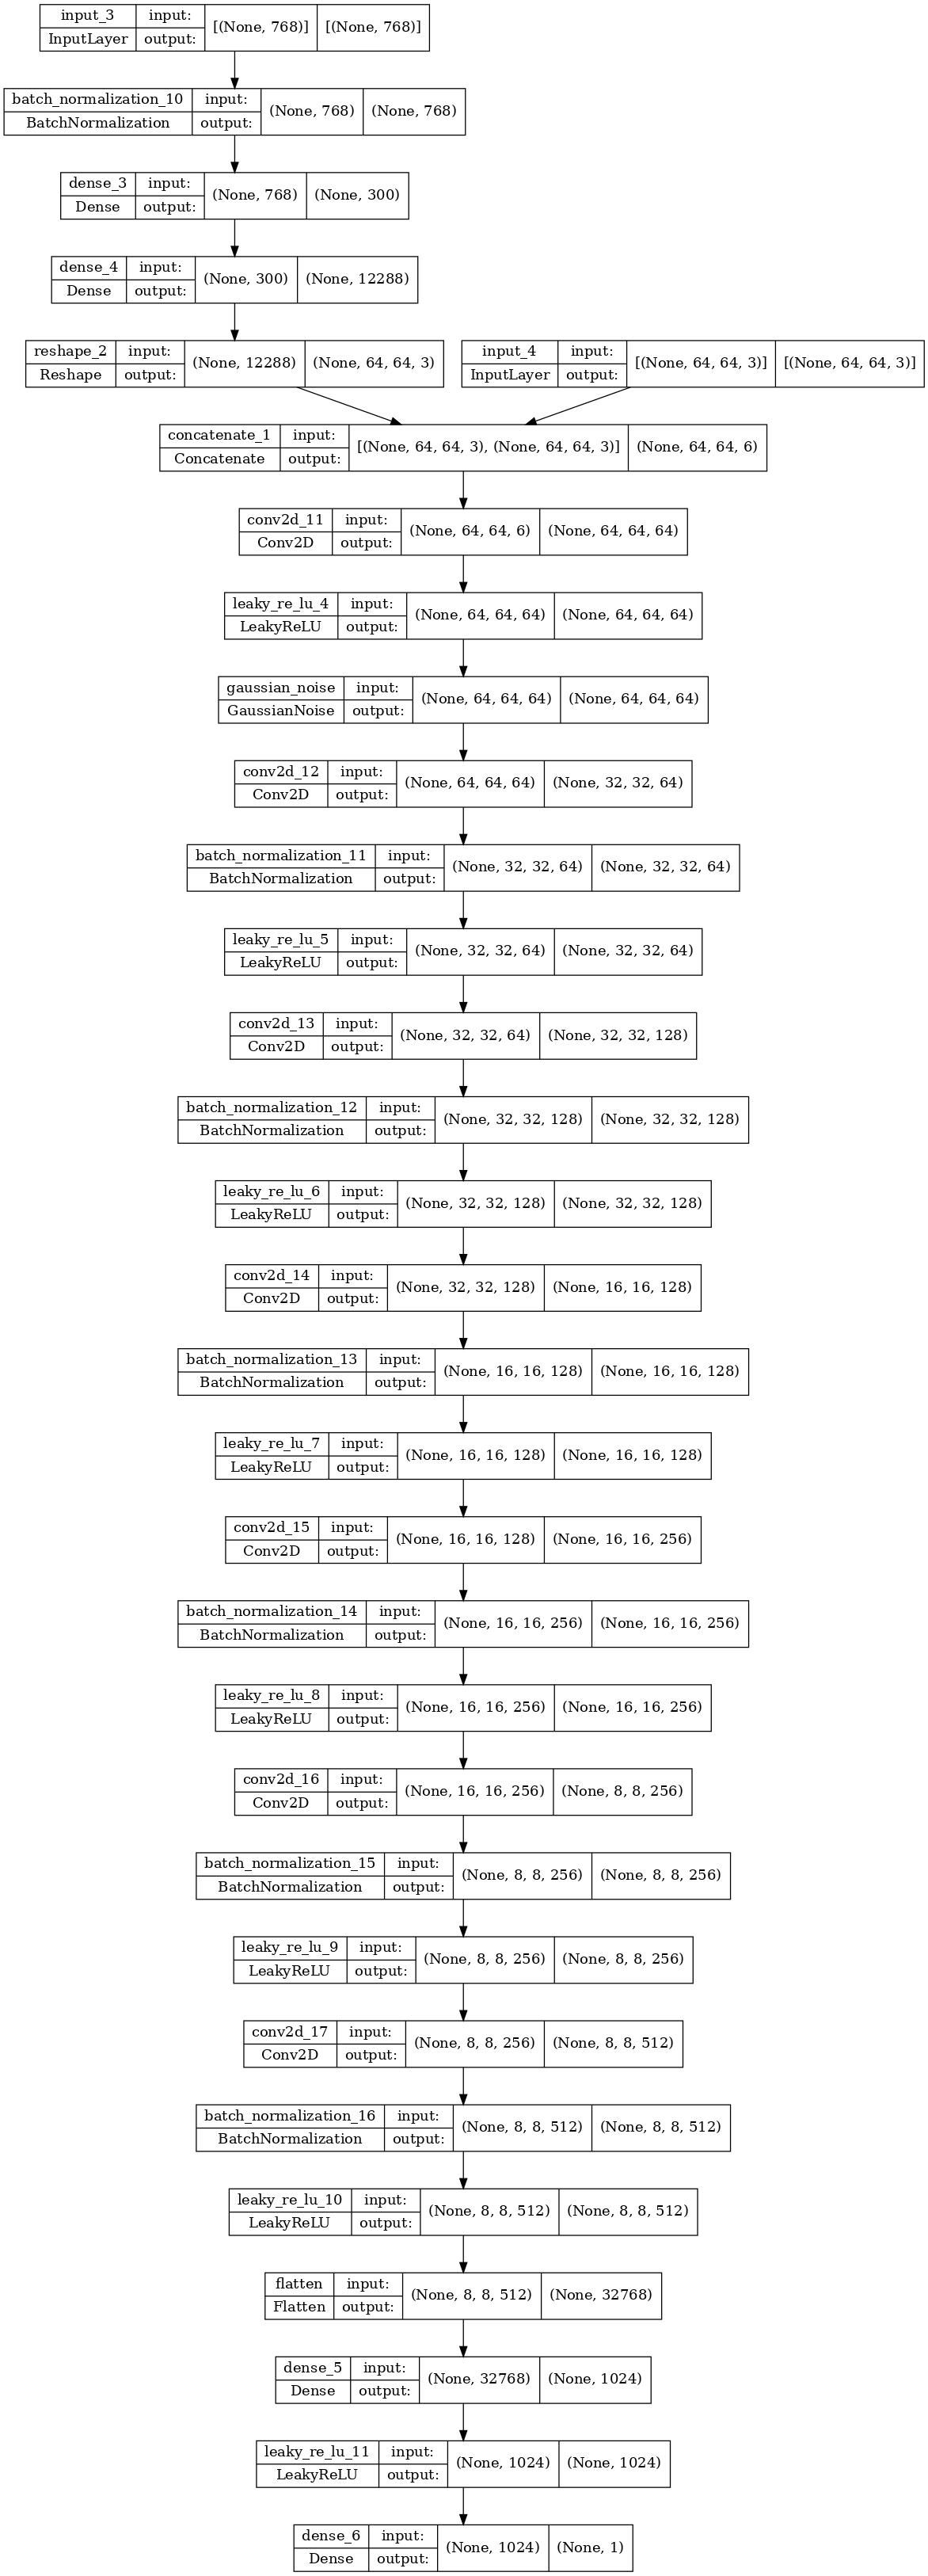

In [30]:
plot_model(disc_plot,to_file="disc_model_bert_batnorm.png",show_shapes=True,dpi=92)

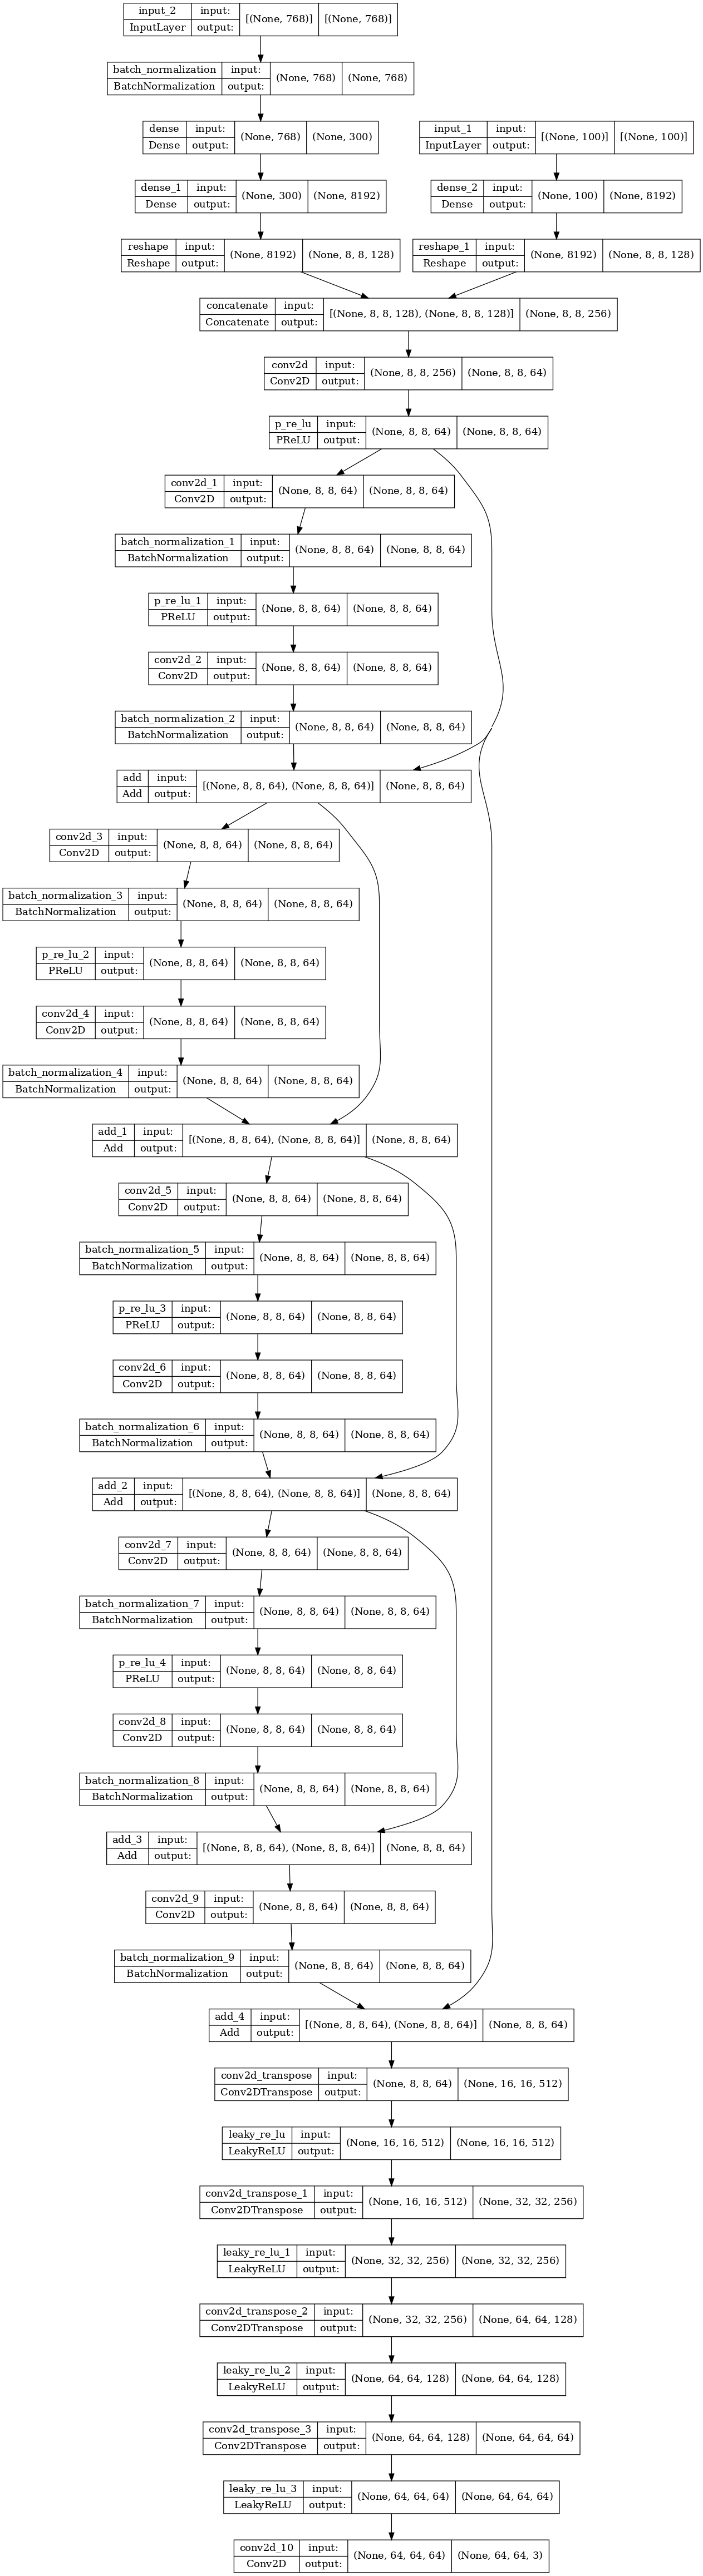

In [31]:
plot_model(g_plot,to_file="gen_model_bert_batnorm.png",show_shapes=True,dpi=92)

In [32]:
g_plot.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 768)         3072        ['input_2[0][0]']                
 alization)                                                                                       
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          230700      ['batch_normalization[0][0]']

                                                                                                  
 add_3 (Add)                    (None, 8, 8, 64)     0           ['add_2[0][0]',                  
                                                                  'batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 8, 8, 64)     36928       ['add_3[0][0]']                  
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 8, 8, 64)    256         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 add_4 (Add)                    (None, 8, 8, 64)     0           ['p_re_lu[0][0]',                
          

In [33]:
from IPython.display import clear_output


def generate_latent_points(latent_dim, n_samples):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions = get_random_word_vectors_from_dataset(n_samples)
    return [x_input, text_captions]

# Randomly flip some labels. Credits to https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/
def noisy_labels(y, p_flip):
    n_select = int(p_flip * int(y.shape[0]))
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)

    op_list = []
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1.0, y[i]))
        else:
            op_list.append(y[i])

    outputs = tf.stack(op_list)
    return outputs

def load_data():
    return asarray(image_embeddings), asarray(captions).astype('float32')

def smooth_positive_labels(y):
	return y - 0.3 + (np.random.random(y.shape) * 0.5)
 
def smooth_negative_labels(y):
	return y + np.random.random(y.shape) * 0.3

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[7, 7])

  for i in range(predictions.shape[0]):
      pyplot.subplot(5, 5, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.savefig('emb_results/image_at_epoch_{:04d}.png'.format(epoch))
  pyplot.show()


def discriminator_loss(r_real_output_real_text, f_fake_output_real_text_1, f_real_output_fake_text):
   alpha = 0.5
   real_output_noise = smooth_positive_labels(noisy_labels(tf.ones_like(r_real_output_real_text), 0.10))
   fake_output_real_text_noise_1 = smooth_negative_labels(tf.zeros_like(f_fake_output_real_text_1))
   real_output_fake_text_noise = smooth_negative_labels(tf.zeros_like(f_real_output_fake_text))

   real_loss = tf.reduce_mean(binary_cross_entropy(real_output_noise, r_real_output_real_text))
   fake_loss_ms_1 = tf.reduce_mean(binary_cross_entropy(fake_output_real_text_noise_1, f_fake_output_real_text_1))
   fake_loss_2 = tf.reduce_mean(binary_cross_entropy(real_output_fake_text_noise, f_real_output_fake_text))

   total_loss = real_loss + alpha * fake_loss_2 + (1-alpha) * fake_loss_ms_1 
   return total_loss

def generator_loss(f_fake_output_real_text):
   return tf.reduce_mean(binary_cross_entropy(tf.ones_like(f_fake_output_real_text), f_fake_output_real_text))

@tf.function
def train_step(images, epoch,n_batch):

    #define half_batch
  latent_dim = 100
  #n_batch = 16
  half_batch = int(n_batch/2)
  noise_1 = tf.random.normal([half_batch, latent_dim])
  noise_2 = tf.random.normal([half_batch, latent_dim])
  real_captions = images[1]
  real_images = images[0]

  random_captions = generate_random_vectors(n_batch)
  random_captions_1, random_captions_2  = tf.split(random_captions, 2, 0)
  real_captions_1, real_captions_2  = tf.split(real_captions, 2 ,0)
  real_images_1, real_images_2 = tf.split(real_images, 2, 0)
  d_loss = 0
  g_loss = 0
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    noise = tf.concat([noise_1, noise_2], 0)

    generated_images = generator([noise, real_captions], training=True)

    fake_1, fake_2 = tf.split(generated_images, 2, 0)

    f_fake_output_real_text_1 = discriminator([fake_1, real_captions_1], training=True)
    f_fake_output_real_text_2 = discriminator([fake_2, real_captions_2], training=True)

    r_real_output_real_text_1 = discriminator([real_images_1, real_captions_1], training=True)
    r_real_output_real_text_2 = discriminator([real_images_2, real_captions_2], training=True)

    f_real_output_fake_text_1 = discriminator([real_images_1, random_captions_1], training=True)
    f_real_output_fake_text_2 = discriminator([real_images_2, random_captions_2], training=True)

    #### Calculating losses ####

    gen_loss = generator_loss(f_fake_output_real_text_1) + generator_loss(f_fake_output_real_text_2) 
    # mode seeking loss
    lz = tf.math.reduce_mean(tf.math.abs(fake_2-fake_1)) / tf.math.reduce_mean(tf.math.abs(noise_2-noise_1))
    eps = 1 * 1e-5
    loss_lz = 1 / (eps+lz) * ms_loss_weight
    total_gen_loss = gen_loss + loss_lz
    g_loss = total_gen_loss
    #if epoch % 10 == 0:
     #   tf.print('G_loss', [total_gen_loss])

    disc_loss_1 = discriminator_loss(r_real_output_real_text_1, f_fake_output_real_text_1, f_real_output_fake_text_1)
    disc_loss_2 = discriminator_loss(r_real_output_real_text_2, f_fake_output_real_text_2, f_real_output_fake_text_2)
    
    total_disc_loss = disc_loss_1 + disc_loss_2
    d_loss = total_disc_loss
        
    

    #### Done calculating losses ####
  if epoch % 10 == 0:
    tf.print('D_loss', [total_disc_loss])
    tf.print('G_loss', [g_loss])
  gradients_of_discriminator = disc_tape.gradient(total_disc_loss, discriminator.trainable_variables)  

  gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables)    

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


from tqdm.notebook import tqdm
def train(dataset, n_batch,start = 0, epochs = 2000):

  checkpoint_dir = 'checkpoint/emb_bert_batnorm'
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)
  
  ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
  if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)  #ckpt_manager.checkpoints[3]
    print ('Latest checkpoint restored!!')

  for epoch in tqdm(range(start, epochs)):
    start = time.time()
    for image_batch in dataset:
        train_step(image_batch, epoch,n_batch) 

    if (epoch) % 10 == 0:
      [z_input, labels_input] = generate_latent_points(100, 25)
      generate_and_save_images(generator,
                            epoch + 1,
                             [z_input, labels_input])

    if (epoch) % 10 == 0:
      ckpt_save_path = ckpt_manager.save()
      print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

    if (epoch) % 10 == 0:
      generator.save('models_emb/46stage_new_gan_animal_model_%03d.h5' % (epoch + 1))     

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))



In [34]:
tf.config.run_functions_eagerly(True)

In [35]:
#gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
#session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [36]:
#len(lbs[1])

Latest checkpoint restored!!


  0%|          | 0/1978 [00:00<?, ?it/s]

Time for epoch 23 is 422.2564859390259 sec
Time for epoch 24 is 441.3795850276947 sec
Time for epoch 25 is 414.5559413433075 sec
Time for epoch 26 is 416.882737159729 sec
Time for epoch 27 is 414.1518681049347 sec
Time for epoch 28 is 426.075674533844 sec
Time for epoch 29 is 409.85657596588135 sec
Time for epoch 30 is 418.5365731716156 sec
D_loss [1.638304]
G_loss [4.62237215]
D_loss [1.71908736]
G_loss [4.423913]
D_loss [2.06143403]
G_loss [5.94312286]
D_loss [1.97893345]
G_loss [3.64975214]
D_loss [2.03821254]
G_loss [3.78324676]
D_loss [1.31749582]
G_loss [5.85389423]
D_loss [1.93152905]
G_loss [5.75169706]
D_loss [2.25838184]
G_loss [3.60584497]
D_loss [2.44686794]
G_loss [3.83995819]
D_loss [2.82287073]
G_loss [3.65262461]
D_loss [2.05259418]
G_loss [4.03366804]
D_loss [1.68342805]
G_loss [4.16854048]
D_loss [1.80511332]
G_loss [5.14893675]
D_loss [1.90512586]
G_loss [4.34343338]
D_loss [2.00889301]
G_loss [6.01687527]
D_loss [2.68474889]
G_loss [3.52972031]
D_loss [1.87592769]
G

G_loss [3.13340521]
D_loss [2.73845863]
G_loss [3.80174685]
D_loss [2.11197829]
G_loss [4.2690239]
D_loss [2.03169537]
G_loss [2.6820991]
D_loss [3.18384838]
G_loss [3.94342184]
D_loss [1.66318297]
G_loss [3.58732724]
D_loss [1.67507505]
G_loss [4.16004181]
D_loss [1.66907811]
G_loss [3.61900854]
D_loss [1.99665308]
G_loss [3.06434488]
D_loss [2.46933842]
G_loss [4.38226557]
D_loss [1.98897302]
G_loss [3.20861912]
D_loss [1.78420889]
G_loss [3.17011547]
D_loss [1.87913752]
G_loss [3.28561807]
D_loss [1.48676598]
G_loss [3.41846609]
D_loss [2.32953811]
G_loss [3.11556578]
D_loss [2.24066353]
G_loss [3.85775161]
D_loss [2.52715778]
G_loss [2.98832583]
D_loss [2.36996174]
G_loss [4.15591955]
D_loss [1.79490733]
G_loss [4.25791836]
D_loss [1.56949401]
G_loss [4.21709728]
D_loss [2.07149434]
G_loss [2.85869026]
D_loss [2.301368]
G_loss [2.89637899]
D_loss [1.80724049]
G_loss [3.52699518]
D_loss [2.18274045]
G_loss [3.85158253]
D_loss [1.15911353]
G_loss [3.18135452]
D_loss [1.75056756]
G_lo

D_loss [1.37316287]
G_loss [3.98817635]
D_loss [1.82170272]
G_loss [3.75150251]
D_loss [2.11287975]
G_loss [4.99496508]
D_loss [1.65382957]
G_loss [4.13342571]
D_loss [3.15516853]
G_loss [5.57389212]
D_loss [1.97344398]
G_loss [3.28543329]
D_loss [1.95107794]
G_loss [3.0198648]
D_loss [1.82029712]
G_loss [2.89394665]
D_loss [1.51084614]
G_loss [2.68700504]
D_loss [1.60169137]
G_loss [3.45701766]
D_loss [2.79340363]
G_loss [4.67886114]
D_loss [2.35574102]
G_loss [2.84532762]
D_loss [1.84694195]
G_loss [3.38536215]
D_loss [1.26375461]
G_loss [4.57873964]
D_loss [1.59954286]
G_loss [4.9825]
D_loss [1.91098261]
G_loss [4.11059761]
D_loss [1.65420568]
G_loss [4.32964039]
D_loss [2.09932852]
G_loss [4.83335686]
D_loss [1.22102118]
G_loss [3.44344187]
D_loss [1.74706364]
G_loss [3.68327904]
D_loss [1.86191344]
G_loss [5.45157528]
D_loss [1.66881514]
G_loss [4.88095379]
D_loss [1.68596506]
G_loss [4.19498158]
D_loss [1.65366495]
G_loss [3.4194777]
D_loss [1.93749213]
G_loss [5.1697979]
D_loss 

D_loss [1.87645543]
G_loss [2.61986566]
D_loss [2.15310144]
G_loss [3.74375534]
D_loss [2.9842782]
G_loss [4.91375256]
D_loss [2.03767133]
G_loss [3.15220594]
D_loss [1.18084824]
G_loss [3.61063766]
D_loss [2.82262564]
G_loss [3.15759969]
D_loss [1.81567287]
G_loss [3.13913226]
D_loss [1.78294647]
G_loss [4.46370506]
D_loss [1.76795602]
G_loss [4.61765862]
D_loss [1.86469722]
G_loss [3.53190136]
D_loss [2.35246706]
G_loss [4.05495453]
D_loss [2.34680843]
G_loss [2.89788651]
D_loss [2.20762682]
G_loss [3.85507226]
D_loss [1.5214808]
G_loss [4.26890135]
D_loss [1.86180031]
G_loss [3.27948856]
D_loss [1.7134788]
G_loss [4.33657265]
D_loss [1.65531015]
G_loss [4.23123646]
D_loss [1.96665251]
G_loss [3.861274]
D_loss [1.85820067]
G_loss [4.38730621]
D_loss [1.9148314]
G_loss [4.49331665]
D_loss [2.06149292]
G_loss [3.75467467]
D_loss [1.61144257]
G_loss [3.47949076]
D_loss [1.46651506]
G_loss [3.85066509]
D_loss [2.38953328]
G_loss [4.26932287]
D_loss [2.70736575]
G_loss [3.26999331]
D_loss

G_loss [4.97359657]
D_loss [2.02013969]
G_loss [4.04442024]
D_loss [1.65585101]
G_loss [3.43766928]
D_loss [2.27459192]
G_loss [3.6957469]
D_loss [2.02213502]
G_loss [3.85524416]
D_loss [2.71171141]
G_loss [2.13572383]
D_loss [2.52820158]
G_loss [2.40081406]
D_loss [1.79953289]
G_loss [3.61150074]
D_loss [1.86945546]
G_loss [4.60909939]
D_loss [1.7745285]
G_loss [4.66607952]
D_loss [1.91020012]
G_loss [3.59842873]
D_loss [1.95908284]
G_loss [3.54099584]
D_loss [1.59924293]
G_loss [3.3983016]
D_loss [1.85054278]
G_loss [4.10199881]
D_loss [1.71511781]
G_loss [4.10064077]
D_loss [1.61845732]
G_loss [3.58845615]
D_loss [2.57035303]
G_loss [2.55719]
D_loss [1.75931203]
G_loss [3.27149725]
D_loss [1.45531189]
G_loss [3.46770692]
D_loss [1.43484426]
G_loss [3.28582788]
D_loss [2.07518911]
G_loss [4.09735107]
D_loss [1.99082756]
G_loss [3.66035032]
D_loss [2.09195638]
G_loss [3.94259167]
D_loss [1.66553223]
G_loss [3.71866608]
D_loss [1.72248983]
G_loss [3.1302042]
D_loss [2.30158234]
G_loss 

D_loss [2.38930082]
G_loss [4.82575893]
D_loss [1.62547016]
G_loss [4.79052]
D_loss [2.1153667]
G_loss [3.301759]
D_loss [1.79998541]
G_loss [4.34666157]
D_loss [1.38438368]
G_loss [3.83115649]
D_loss [1.74871]
G_loss [5.17906046]
D_loss [1.82968521]
G_loss [3.97297573]
D_loss [2.02461529]
G_loss [3.95561528]
D_loss [2.50777102]
G_loss [4.42956829]
D_loss [1.79530811]
G_loss [3.97380209]
D_loss [2.00472736]
G_loss [3.27956581]
D_loss [1.82098448]
G_loss [4.49973202]
D_loss [2.11784697]
G_loss [3.8098855]
D_loss [1.31751418]
G_loss [4.23950577]
D_loss [2.0959115]
G_loss [3.95645761]
D_loss [1.97549689]
G_loss [3.66379261]
D_loss [2.23130035]
G_loss [4.3673]
D_loss [1.75804424]
G_loss [3.33442163]
D_loss [1.84229326]
G_loss [3.15135384]
D_loss [2.32881021]
G_loss [2.84359288]
D_loss [1.85014725]
G_loss [2.80587626]
D_loss [1.72165143]
G_loss [3.98950529]
D_loss [2.01156712]
G_loss [3.48646259]
D_loss [2.26991725]
G_loss [5.88316727]
D_loss [1.80121422]
G_loss [5.2464838]
D_loss [1.303822

G_loss [4.34580135]
D_loss [2.50807714]
G_loss [4.32600212]
D_loss [2.64403248]
G_loss [2.15487099]
D_loss [2.20069742]
G_loss [2.92963743]
D_loss [2.16008139]
G_loss [4.46107531]
D_loss [1.61941814]
G_loss [4.2282629]
D_loss [1.84939158]
G_loss [3.62950897]
D_loss [2.06486917]
G_loss [3.08523273]
D_loss [1.67482424]
G_loss [3.52241182]
D_loss [2.21746445]
G_loss [2.76789379]
D_loss [1.26573992]
G_loss [3.82766533]
D_loss [1.63578558]
G_loss [3.75173044]
D_loss [1.76327896]
G_loss [3.07164645]
D_loss [1.80557299]
G_loss [3.42196083]
D_loss [2.01181746]
G_loss [3.89419556]
D_loss [1.69484782]
G_loss [3.72878861]
D_loss [1.93455696]
G_loss [3.49365783]
D_loss [2.29800797]
G_loss [3.85261679]
D_loss [1.60751247]
G_loss [4.44816113]
D_loss [2.65891457]
G_loss [4.01742935]
D_loss [2.01619]
G_loss [2.25436354]
D_loss [2.05046463]
G_loss [3.32311726]
D_loss [1.77488565]
G_loss [3.20431519]
D_loss [2.21212363]
G_loss [4.04969549]
D_loss [2.07492805]
G_loss [4.62219572]
D_loss [2.15169811]
G_lo

G_loss [4.59451962]
D_loss [2.03293109]
G_loss [3.72288895]
D_loss [1.55180502]
G_loss [4.09699917]
D_loss [1.41734278]
G_loss [3.82138705]
D_loss [1.2887218]
G_loss [3.50247574]
D_loss [3.45024109]
G_loss [3.44168282]
D_loss [1.69647264]
G_loss [2.51235533]
D_loss [2.10658312]
G_loss [4.96303558]
D_loss [1.92581213]
G_loss [4.7361412]
D_loss [2.18530655]
G_loss [3.16327333]
D_loss [1.75116181]
G_loss [4.27221489]
D_loss [1.57008457]
G_loss [4.92188168]
D_loss [1.77789724]
G_loss [3.61434531]
D_loss [2.41663671]
G_loss [3.25046372]
D_loss [2.59465981]
G_loss [3.33533669]
D_loss [2.00327682]
G_loss [3.73008919]
D_loss [2.3403821]
G_loss [4.35366488]
D_loss [2.98490095]
G_loss [5.96531105]
D_loss [1.89829087]
G_loss [4.55100203]
D_loss [2.1693182]
G_loss [2.90198326]
D_loss [2.27511215]
G_loss [3.09532952]
D_loss [2.4761796]
G_loss [4.32381487]
D_loss [1.99889064]
G_loss [3.96128654]
D_loss [1.88584828]
G_loss [4.26695633]
D_loss [2.60685825]
G_loss [3.63394952]
D_loss [2.70118189]
G_los

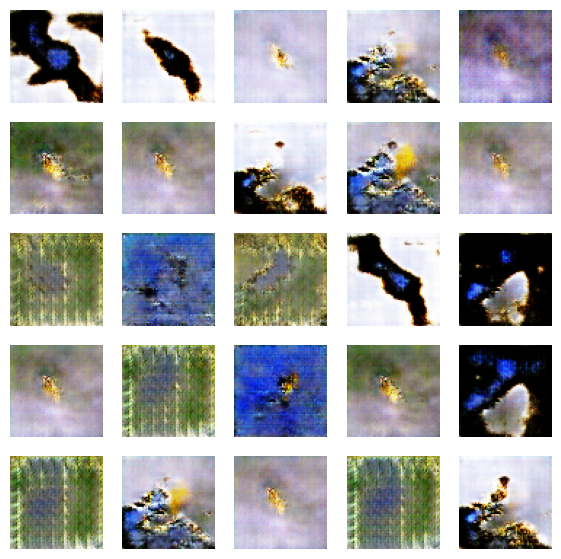

Saving checkpoint for epoch 31 at checkpoint/emb_bert_batnorm/ckpt-4
Time for epoch 31 is 418.28389525413513 sec
Time for epoch 32 is 428.9382998943329 sec
Time for epoch 33 is 413.49927854537964 sec
Time for epoch 34 is 412.20300102233887 sec
Time for epoch 35 is 432.2618656158447 sec
Time for epoch 36 is 424.222291469574 sec
Time for epoch 37 is 443.5238356590271 sec
Time for epoch 38 is 437.64970779418945 sec
Time for epoch 39 is 429.6901376247406 sec
Time for epoch 40 is 432.0243456363678 sec
D_loss [2.29577017]
G_loss [4.2494359]
D_loss [1.40036368]
G_loss [4.66456699]
D_loss [1.71612]
G_loss [4.25622368]
D_loss [1.36554813]
G_loss [4.3323431]
D_loss [1.69449139]
G_loss [5.0638361]
D_loss [1.84026229]
G_loss [6.25496435]
D_loss [2.16548538]
G_loss [3.56253862]
D_loss [1.97153294]
G_loss [3.75844669]
D_loss [2.24916244]
G_loss [3.87540674]
D_loss [2.26339459]
G_loss [4.63058138]
D_loss [3.63239145]
G_loss [3.73493314]
D_loss [3.39960623]
G_loss [3.07172871]
D_loss [2.56293201]
G_lo

D_loss [2.09831619]
G_loss [3.63429451]
D_loss [1.77160132]
G_loss [3.70705414]
D_loss [1.48086905]
G_loss [4.18621445]
D_loss [1.38461637]
G_loss [5.78133297]
D_loss [1.64876246]
G_loss [3.76672506]
D_loss [1.63485909]
G_loss [4.62827969]
D_loss [1.12370241]
G_loss [3.72096157]
D_loss [1.72749937]
G_loss [3.83704782]
D_loss [1.87517738]
G_loss [3.86850858]
D_loss [1.4923358]
G_loss [7.08082962]
D_loss [1.26097298]
G_loss [5.11373377]
D_loss [1.4059937]
G_loss [5.50292]
D_loss [2.61850357]
G_loss [5.29996967]
D_loss [2.06567097]
G_loss [3.26637697]
D_loss [1.76021278]
G_loss [3.69235277]
D_loss [1.70230234]
G_loss [4.05785942]
D_loss [1.7020371]
G_loss [5.57253933]
D_loss [1.59521174]
G_loss [3.51597738]
D_loss [1.58001971]
G_loss [4.08643103]
D_loss [1.90428925]
G_loss [5.96040058]
D_loss [2.00146246]
G_loss [3.43934655]
D_loss [1.6590116]
G_loss [3.835989]
D_loss [1.38958383]
G_loss [5.23816204]
D_loss [2.20059919]
G_loss [5.2199831]
D_loss [1.59574413]
G_loss [4.03552675]
D_loss [2.

D_loss [1.42061639]
G_loss [5.88581276]
D_loss [1.8920002]
G_loss [3.91123438]
D_loss [1.85141706]
G_loss [4.68870068]
D_loss [1.64007282]
G_loss [4.27405739]
D_loss [1.47616112]
G_loss [4.38171577]
D_loss [1.73639297]
G_loss [5.93127823]
D_loss [1.62877321]
G_loss [4.65463734]
D_loss [2.40496349]
G_loss [5.77859783]
D_loss [1.6164434]
G_loss [5.29957342]
D_loss [1.98613846]
G_loss [3.33035469]
D_loss [1.954898]
G_loss [2.79555416]
D_loss [1.51080656]
G_loss [3.60097456]
D_loss [1.46402287]
G_loss [4.94458246]
D_loss [1.76042032]
G_loss [5.46401358]
D_loss [1.5945127]
G_loss [3.3353281]
D_loss [1.17392945]
G_loss [4.80559874]
D_loss [2.45872927]
G_loss [2.89800119]
D_loss [1.76119304]
G_loss [5.08227825]
D_loss [1.9313252]
G_loss [4.93883228]
D_loss [1.92813826]
G_loss [4.16890621]
D_loss [2.16486287]
G_loss [4.77665043]
D_loss [2.52642751]
G_loss [5.28900051]
D_loss [2.35782671]
G_loss [4.97123718]
D_loss [1.6939379]
G_loss [5.07504177]
D_loss [2.2167716]
G_loss [4.01916075]
D_loss [2

G_loss [4.76174784]
D_loss [2.08397865]
G_loss [3.80468512]
D_loss [1.25983155]
G_loss [4.30334663]
D_loss [0.767234445]
G_loss [4.19022703]
D_loss [1.75327539]
G_loss [4.9262619]
D_loss [1.45655775]
G_loss [4.45266628]
D_loss [1.51062036]
G_loss [3.52303314]
D_loss [1.24101853]
G_loss [3.3972981]
D_loss [1.58926487]
G_loss [3.99926591]
D_loss [0.955894828]
G_loss [4.40830708]
D_loss [2.34112263]
G_loss [6.35963583]
D_loss [1.24873161]
G_loss [5.42172813]
D_loss [1.60335815]
G_loss [7.43793726]
D_loss [1.44521034]
G_loss [4.41776466]
D_loss [1.57311678]
G_loss [3.89917231]
D_loss [1.99080944]
G_loss [4.38009453]
D_loss [2.02713752]
G_loss [2.74520135]
D_loss [1.8661567]
G_loss [4.19436646]
D_loss [1.85842168]
G_loss [4.10524082]
D_loss [1.76938796]
G_loss [4.89720917]
D_loss [1.76075244]
G_loss [3.85335732]
D_loss [1.45646334]
G_loss [3.59704733]
D_loss [1.66048288]
G_loss [4.69113541]
D_loss [2.0078032]
G_loss [5.12285614]
D_loss [1.42363524]
G_loss [3.91610241]
D_loss [1.44481802]
G_

G_loss [3.20625973]
D_loss [1.77942991]
G_loss [4.35981512]
D_loss [1.28359246]
G_loss [4.33875465]
D_loss [1.7482568]
G_loss [4.21359253]
D_loss [1.92885041]
G_loss [3.95404053]
D_loss [1.79849792]
G_loss [2.73864222]
D_loss [1.52154148]
G_loss [4.16485167]
D_loss [1.47811377]
G_loss [4.58779621]
D_loss [2.30488634]
G_loss [3.26826954]
D_loss [1.8027401]
G_loss [3.83743954]
D_loss [1.75390744]
G_loss [3.87978339]
D_loss [2.44321299]
G_loss [2.9249649]
D_loss [1.88315511]
G_loss [5.25785446]
D_loss [1.27423406]
G_loss [4.24659443]
D_loss [1.73842859]
G_loss [3.84539747]
D_loss [1.42948556]
G_loss [3.75140619]
D_loss [1.52964187]
G_loss [4.0832963]
D_loss [2.25165653]
G_loss [4.37465048]
D_loss [1.91991961]
G_loss [2.58998775]
D_loss [2.11623859]
G_loss [3.59554601]
D_loss [1.94536507]
G_loss [2.94399762]
D_loss [1.62491703]
G_loss [4.40846539]
D_loss [1.87030864]
G_loss [2.90713596]
D_loss [1.53471422]
G_loss [5.08806038]
D_loss [1.82361686]
G_loss [5.5162673]
D_loss [1.47890162]
G_los

G_loss [3.18259907]
D_loss [1.79526114]
G_loss [4.23363829]
D_loss [1.85924852]
G_loss [4.01980639]
D_loss [1.7717433]
G_loss [4.97621918]
D_loss [2.45829058]
G_loss [3.48993206]
D_loss [1.98002315]
G_loss [3.52625942]
D_loss [1.35783267]
G_loss [2.90370274]
D_loss [1.65813172]
G_loss [3.37709713]
D_loss [1.74643111]
G_loss [2.84608]
D_loss [1.33626699]
G_loss [3.9098978]
D_loss [1.76208162]
G_loss [3.5585413]
D_loss [1.98949301]
G_loss [3.76651716]
D_loss [1.80944085]
G_loss [4.04141235]
D_loss [2.06418324]
G_loss [4.00550556]
D_loss [1.68604946]
G_loss [3.57545376]
D_loss [2.09945965]
G_loss [3.97887897]
D_loss [2.14258862]
G_loss [4.04234]
D_loss [2.14509225]
G_loss [3.60189295]
D_loss [2.27593446]
G_loss [2.11125]
D_loss [1.97608173]
G_loss [3.41331196]
D_loss [1.32202649]
G_loss [4.33393192]
D_loss [1.44205523]
G_loss [3.22964525]
D_loss [0.908966422]
G_loss [3.94228673]
D_loss [1.18421936]
G_loss [3.91514397]
D_loss [1.91865802]
G_loss [3.57068634]
D_loss [2.29369307]
G_loss [3.8

G_loss [3.85169935]
D_loss [1.60107899]
G_loss [2.49677825]
D_loss [1.90933943]
G_loss [4.41747093]
D_loss [1.68651438]
G_loss [4.7847724]
D_loss [1.25209069]
G_loss [4.46327829]
D_loss [1.06584358]
G_loss [5.01375532]
D_loss [1.6461879]
G_loss [3.03544235]
D_loss [2.07226372]
G_loss [3.41303587]
D_loss [1.70795667]
G_loss [5.17336512]
D_loss [2.19000292]
G_loss [2.89247513]
D_loss [2.31454253]
G_loss [2.98638034]
D_loss [2.21555471]
G_loss [5.32311153]
D_loss [2.18878126]
G_loss [4.89988422]
D_loss [1.50313663]
G_loss [3.98820376]
D_loss [1.72591555]
G_loss [3.89919186]
D_loss [1.876616]
G_loss [7.08673286]
D_loss [1.85448396]
G_loss [6.4744854]
D_loss [2.65488648]
G_loss [4.01560116]
D_loss [2.27620578]
G_loss [2.15387154]
D_loss [1.92235875]
G_loss [3.04573774]
D_loss [1.99914813]
G_loss [3.28425169]
D_loss [1.22641468]
G_loss [4.73087168]
D_loss [1.68824315]
G_loss [4.57866335]
D_loss [1.59525752]
G_loss [3.81169653]
D_loss [1.97675788]
G_loss [3.56481552]
D_loss [1.72663]
G_loss [

G_loss [3.65139437]
D_loss [1.80378354]
G_loss [4.26614952]
D_loss [2.02681565]
G_loss [3.988307]
D_loss [1.88017118]
G_loss [4.09871864]
D_loss [2.06289768]
G_loss [4.19769144]
D_loss [1.28860188]
G_loss [3.42958975]
D_loss [1.83060694]
G_loss [3.09763908]
D_loss [1.91648436]
G_loss [3.93741345]
D_loss [2.15468645]
G_loss [3.69792485]
D_loss [1.62346387]
G_loss [3.61114454]
D_loss [1.86771345]
G_loss [3.69544721]
D_loss [2.28814983]
G_loss [3.32338905]
D_loss [1.72736108]
G_loss [3.36926746]
D_loss [0.791478038]
G_loss [6.41079426]
D_loss [1.64966869]
G_loss [4.73830223]
D_loss [1.63317275]
G_loss [4.61462688]
D_loss [2.09587312]
G_loss [5.91975451]
D_loss [1.00706947]
G_loss [4.00435734]
D_loss [1.61047]
G_loss [5.03683519]
D_loss [1.12062371]
G_loss [4.44892883]
D_loss [1.92309511]
G_loss [3.61218667]
D_loss [1.59121108]
G_loss [3.65411377]
D_loss [1.63997054]
G_loss [3.85992599]
D_loss [1.27896547]
G_loss [3.72779632]
D_loss [1.94643092]
G_loss [4.87724209]
D_loss [1.73077524]
G_lo

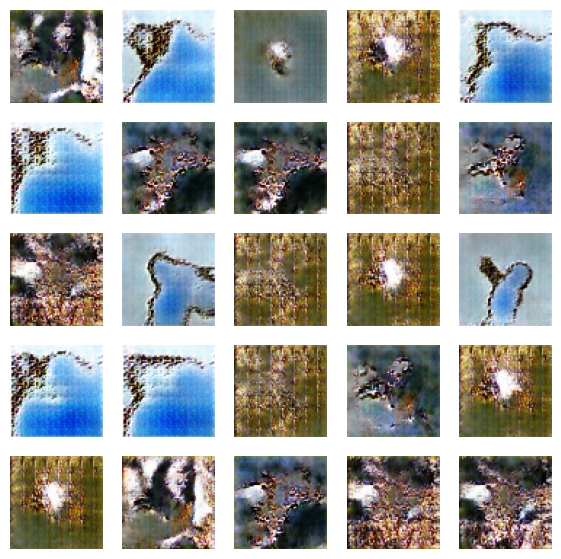

Saving checkpoint for epoch 41 at checkpoint/emb_bert_batnorm/ckpt-5
Time for epoch 41 is 442.16264510154724 sec
Time for epoch 42 is 430.2202146053314 sec
Time for epoch 43 is 420.32974767684937 sec
Time for epoch 44 is 402.0441982746124 sec
Time for epoch 45 is 410.3125202655792 sec
Time for epoch 46 is 402.8009250164032 sec
Time for epoch 47 is 415.991042137146 sec
Time for epoch 48 is 417.45054507255554 sec
Time for epoch 49 is 436.35690236091614 sec
Time for epoch 50 is 444.08742666244507 sec
D_loss [1.86315799]
G_loss [4.04390526]
D_loss [1.86847079]
G_loss [3.9757452]
D_loss [1.81384]
G_loss [4.22885895]
D_loss [1.56571627]
G_loss [3.80735922]
D_loss [1.76554143]
G_loss [3.5727458]
D_loss [2.26542091]
G_loss [3.83421612]
D_loss [2.18976569]
G_loss [2.8612752]
D_loss [2.41902781]
G_loss [4.48524761]
D_loss [1.90992844]
G_loss [3.61666298]
D_loss [1.01620555]
G_loss [4.38491058]
D_loss [1.73219073]
G_loss [3.7456727]
D_loss [1.92339492]
G_loss [4.39347267]
D_loss [1.44982946]
G_lo

G_loss [5.02974415]
D_loss [1.79436731]
G_loss [3.28874278]
D_loss [1.3014133]
G_loss [4.98805141]
D_loss [1.29106641]
G_loss [4.88767385]
D_loss [1.44177]
G_loss [4.7634306]
D_loss [1.7197783]
G_loss [4.209445]
D_loss [1.5046488]
G_loss [3.61936474]
D_loss [1.74175036]
G_loss [4.13347054]
D_loss [2.29012942]
G_loss [4.87520313]
D_loss [2.26601148]
G_loss [4.57705212]
D_loss [1.55985641]
G_loss [3.2772615]
D_loss [1.78896618]
G_loss [3.41173506]
D_loss [1.80906355]
G_loss [3.95022678]
D_loss [1.39594328]
G_loss [4.04138756]
D_loss [1.90828991]
G_loss [5.42461061]
D_loss [1.6123867]
G_loss [3.30171156]
D_loss [1.26393402]
G_loss [4.77914238]
D_loss [2.15602231]
G_loss [3.68323183]
D_loss [1.59252989]
G_loss [4.28167057]
D_loss [1.51895416]
G_loss [4.51259518]
D_loss [1.9029547]
G_loss [4.2708292]
D_loss [1.93115473]
G_loss [5.1534853]
D_loss [2.26578021]
G_loss [3.08698416]
D_loss [1.74274862]
G_loss [4.13865662]
D_loss [1.93956065]
G_loss [3.35471535]
D_loss [1.34004664]
G_loss [3.9461

G_loss [4.16444826]
D_loss [1.68146014]
G_loss [3.72061253]
D_loss [1.49732494]
G_loss [3.41881609]
D_loss [1.5842793]
G_loss [3.3837266]
D_loss [1.4757055]
G_loss [5.61452436]
D_loss [1.51194179]
G_loss [4.35154629]
D_loss [1.21815991]
G_loss [4.71873379]
D_loss [0.898406267]
G_loss [5.3786993]
D_loss [1.45657849]
G_loss [4.72958374]
D_loss [2.21172619]
G_loss [3.82473]
D_loss [1.77737868]
G_loss [5.11657524]
D_loss [1.64094162]
G_loss [4.76143742]
D_loss [1.70577741]
G_loss [5.58890629]
D_loss [1.58715582]
G_loss [4.06628847]
D_loss [1.65317941]
G_loss [2.91905022]
D_loss [1.93433058]
G_loss [3.56017303]
D_loss [1.06828725]
G_loss [4.65528631]
D_loss [1.86868]
G_loss [3.83666134]
D_loss [2.25089502]
G_loss [4.42069626]
D_loss [1.74722028]
G_loss [4.68907833]
D_loss [1.86992908]
G_loss [3.71651316]
D_loss [2.05534983]
G_loss [3.39960957]
D_loss [1.56300557]
G_loss [4.09352493]
D_loss [1.22818518]
G_loss [6.11477184]
D_loss [1.60007954]
G_loss [4.64267969]
D_loss [0.662463427]
G_loss [

D_loss [1.7947135]
G_loss [4.46623898]
D_loss [1.51708639]
G_loss [5.58043766]
D_loss [0.989601374]
G_loss [4.31420946]
D_loss [1.72204876]
G_loss [3.28182745]
D_loss [1.68457699]
G_loss [4.68247318]
D_loss [1.82709837]
G_loss [5.15150738]
D_loss [1.66272342]
G_loss [5.60689068]
D_loss [1.85380876]
G_loss [5.01697826]
D_loss [1.64502978]
G_loss [4.40456104]
D_loss [2.56801176]
G_loss [3.3063972]
D_loss [2.15218019]
G_loss [4.99371243]
D_loss [2.20278835]
G_loss [3.48490429]
D_loss [2.12614846]
G_loss [2.81017208]
D_loss [1.54934072]
G_loss [4.61888]
D_loss [2.12521648]
G_loss [6.74074173]
D_loss [2.11896324]
G_loss [4.12098789]
D_loss [1.63909006]
G_loss [3.5018146]
D_loss [1.83342218]
G_loss [3.70915651]
D_loss [1.85795236]
G_loss [5.0165205]
D_loss [1.54646254]
G_loss [4.06988811]
D_loss [2.13618279]
G_loss [2.7115345]
D_loss [1.59346032]
G_loss [4.60481834]
D_loss [1.69408846]
G_loss [4.63744545]
D_loss [1.8037765]
G_loss [5.48335838]
D_loss [2.0081737]
G_loss [3.57604814]
D_loss [1

D_loss [2.07462955]
G_loss [5.22603226]
D_loss [1.18252838]
G_loss [3.49558735]
D_loss [1.57498634]
G_loss [4.13948727]
D_loss [1.46404517]
G_loss [3.01619911]
D_loss [1.67967629]
G_loss [3.99091148]
D_loss [1.80167985]
G_loss [4.6847558]
D_loss [1.28950739]
G_loss [3.59753442]
D_loss [1.45934]
G_loss [5.15001583]
D_loss [1.14567304]
G_loss [3.57831788]
D_loss [1.32749438]
G_loss [4.89609]
D_loss [1.49542332]
G_loss [4.73372841]
D_loss [1.65645146]
G_loss [3.9252038]
D_loss [1.66369414]
G_loss [4.76404619]
D_loss [1.36603904]
G_loss [3.78144288]
D_loss [1.70763302]
G_loss [3.95262432]
D_loss [1.33767676]
G_loss [4.35393381]
D_loss [1.59869361]
G_loss [6.28279114]
D_loss [1.78226304]
G_loss [3.85507822]
D_loss [1.4221009]
G_loss [3.84548402]
D_loss [1.46481848]
G_loss [4.29516029]
D_loss [1.92062593]
G_loss [6.66032887]
D_loss [1.7251513]
G_loss [4.1551528]
D_loss [1.54313707]
G_loss [3.65866351]
D_loss [1.10072589]
G_loss [6.05082703]
D_loss [1.20229805]
G_loss [3.64384222]
D_loss [1.5

D_loss [0.668934524]
G_loss [5.61398888]
D_loss [1.38503695]
G_loss [5.42058086]
D_loss [1.85086763]
G_loss [3.14738607]
D_loss [1.84550619]
G_loss [5.74368668]
D_loss [1.26943111]
G_loss [5.56446314]
D_loss [1.54259634]
G_loss [4.11173105]
D_loss [1.66429329]
G_loss [5.53872156]
D_loss [1.30292559]
G_loss [5.19426537]
D_loss [1.69072342]
G_loss [4.4188118]
D_loss [1.33603251]
G_loss [5.54683781]
D_loss [2.26943612]
G_loss [4.50337315]
D_loss [2.07410717]
G_loss [5.79233408]
D_loss [0.890033722]
G_loss [4.35024357]
D_loss [1.57856584]
G_loss [4.8257246]
D_loss [2.68982744]
G_loss [5.14607286]
D_loss [1.4024682]
G_loss [4.69679785]
D_loss [1.72463202]
G_loss [3.65968]
D_loss [2.01462603]
G_loss [4.42257738]
D_loss [1.35329056]
G_loss [4.93676376]
D_loss [2.27334404]
G_loss [5.03428459]
D_loss [0.839897096]
G_loss [6.11249924]
D_loss [1.55608308]
G_loss [5.17443895]
D_loss [1.0677532]
G_loss [4.78297758]
D_loss [1.31815171]
G_loss [4.13677645]
D_loss [1.43478572]
G_loss [4.8048687]
D_los

G_loss [2.47116208]
D_loss [0.938662946]
G_loss [5.27496624]
D_loss [2.00991488]
G_loss [4.09784412]
D_loss [0.789355874]
G_loss [3.53838778]
D_loss [1.18358445]
G_loss [3.90802383]
D_loss [1.1150974]
G_loss [4.19606876]
D_loss [1.83294392]
G_loss [4.64335203]
D_loss [2.04364538]
G_loss [4.46880484]
D_loss [1.38001657]
G_loss [4.16383505]
D_loss [1.57643604]
G_loss [3.53627539]
D_loss [1.3129003]
G_loss [6.15820694]
D_loss [1.53963363]
G_loss [3.92199]
D_loss [1.35293412]
G_loss [4.41322088]
D_loss [2.48573637]
G_loss [5.32252789]
D_loss [2.35600519]
G_loss [3.22478056]
D_loss [1.43237185]
G_loss [5.45550156]
D_loss [2.20074892]
G_loss [3.72501278]
D_loss [2.03682113]
G_loss [4.90071201]
D_loss [2.41253471]
G_loss [5.36961842]
D_loss [2.21775794]
G_loss [2.823107]
D_loss [1.81880522]
G_loss [3.27825332]
D_loss [1.86571527]
G_loss [3.83993673]
D_loss [1.49447846]
G_loss [5.86599064]
D_loss [0.876839519]
G_loss [4.21107149]
D_loss [1.672122]
G_loss [4.12149382]
D_loss [1.45069075]
G_loss

D_loss [2.04364]
G_loss [3.62678266]
D_loss [1.56383109]
G_loss [4.84934378]
D_loss [1.82157576]
G_loss [5.55407572]
D_loss [1.05150247]
G_loss [4.53855515]
D_loss [1.32800961]
G_loss [4.51742268]
D_loss [1.80457759]
G_loss [3.78625345]
D_loss [1.49267399]
G_loss [4.0140748]
D_loss [1.7114588]
G_loss [4.77719498]
D_loss [1.81895041]
G_loss [4.35870647]
D_loss [1.59635222]
G_loss [4.74316216]
D_loss [1.96213555]
G_loss [3.76701164]
D_loss [1.8386364]
G_loss [5.6427803]
D_loss [1.60723174]
G_loss [5.36937618]
D_loss [1.53401136]
G_loss [3.62517023]
D_loss [1.90303421]
G_loss [3.53550291]
D_loss [1.72685277]
G_loss [2.99993801]
D_loss [1.70104575]
G_loss [2.98398805]
D_loss [1.59140372]
G_loss [4.20292759]
D_loss [3.94560385]
G_loss [5.77944]
D_loss [1.73096061]
G_loss [3.57774878]
D_loss [2.70507479]
G_loss [2.12987947]
D_loss [1.6657114]
G_loss [3.32159066]
D_loss [1.86653614]
G_loss [4.1448822]
D_loss [1.3988266]
G_loss [5.06715]
D_loss [1.13718677]
G_loss [8.10911655]
D_loss [2.027511

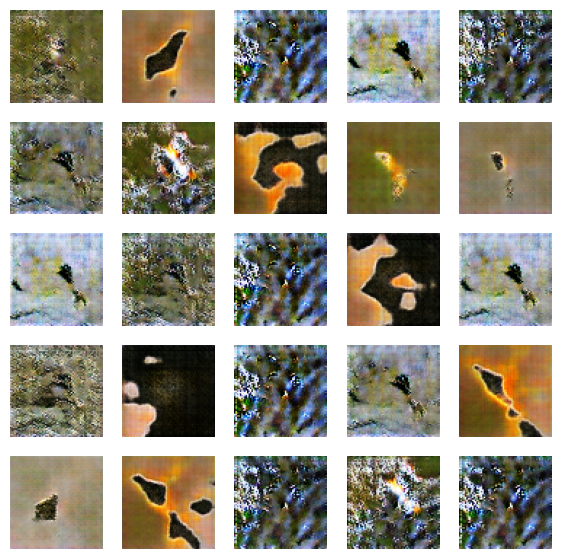

Saving checkpoint for epoch 51 at checkpoint/emb_bert_batnorm/ckpt-6
Time for epoch 51 is 436.2188136577606 sec
Time for epoch 52 is 438.38340425491333 sec
Time for epoch 53 is 421.1544361114502 sec
Time for epoch 54 is 405.3262720108032 sec
Time for epoch 55 is 433.2237536907196 sec
Time for epoch 56 is 439.04533672332764 sec
Time for epoch 57 is 431.30819439888 sec
Time for epoch 58 is 436.99639415740967 sec
Time for epoch 59 is 437.4024612903595 sec
Time for epoch 60 is 427.7892563343048 sec
D_loss [2.1152339]
G_loss [5.05304241]
D_loss [1.35155499]
G_loss [4.75000906]
D_loss [1.16337717]
G_loss [5.51937628]
D_loss [2.45833898]
G_loss [5.45789909]
D_loss [2.03290033]
G_loss [3.94327617]
D_loss [1.37537503]
G_loss [3.96111631]
D_loss [1.82946956]
G_loss [3.24236774]
D_loss [1.59856737]
G_loss [5.59560204]
D_loss [1.59203672]
G_loss [4.46755314]
D_loss [1.69458401]
G_loss [3.97144318]
D_loss [1.79512143]
G_loss [3.56518817]
D_loss [2.06930828]
G_loss [4.77510548]
D_loss [0.997155547]


G_loss [5.25155783]
D_loss [1.05856788]
G_loss [4.56533146]
D_loss [1.60958695]
G_loss [4.30074358]
D_loss [2.09852076]
G_loss [5.44446278]
D_loss [1.85988533]
G_loss [3.31839967]
D_loss [2.8932097]
G_loss [5.88741255]
D_loss [1.85411179]
G_loss [5.4116087]
D_loss [1.82763076]
G_loss [4.48642063]
D_loss [1.21333694]
G_loss [4.94564533]
D_loss [1.66850424]
G_loss [5.57028341]
D_loss [1.22047317]
G_loss [4.03487396]
D_loss [1.84517848]
G_loss [3.91999936]
D_loss [1.51464915]
G_loss [4.70538139]
D_loss [1.51867843]
G_loss [4.82847786]
D_loss [0.910804689]
G_loss [4.98573685]
D_loss [1.49310136]
G_loss [5.1166954]
D_loss [1.27303052]
G_loss [4.76166821]
D_loss [1.13965178]
G_loss [3.72866511]
D_loss [1.74138713]
G_loss [3.15928411]
D_loss [1.90758431]
G_loss [5.51851702]
D_loss [1.94629872]
G_loss [5.67540741]
D_loss [1.09987223]
G_loss [4.55117273]
D_loss [1.30746377]
G_loss [4.04030704]
D_loss [2.09566307]
G_loss [3.72719431]
D_loss [1.94437861]
G_loss [4.56637335]
D_loss [2.45693946]
G_

D_loss [1.40067387]
G_loss [4.83899593]
D_loss [1.08501887]
G_loss [4.79946232]
D_loss [1.22049975]
G_loss [5.91136742]
D_loss [1.67454326]
G_loss [4.4226265]
D_loss [1.89667821]
G_loss [3.74984169]
D_loss [1.97041893]
G_loss [4.55150318]
D_loss [1.75281596]
G_loss [4.83269405]
D_loss [2.13786912]
G_loss [4.11253309]
D_loss [1.88575637]
G_loss [4.12604904]
D_loss [1.41105807]
G_loss [4.05158186]
D_loss [1.44884765]
G_loss [4.30078459]
D_loss [1.67502463]
G_loss [5.15616417]
D_loss [1.63110113]
G_loss [3.47162199]
D_loss [1.51040125]
G_loss [4.23968744]
D_loss [1.88983655]
G_loss [4.41463089]
D_loss [2.01927567]
G_loss [5.09186649]
D_loss [1.31881785]
G_loss [3.51957107]
D_loss [2.01144838]
G_loss [4.0561614]
D_loss [1.92121267]
G_loss [5.83580112]
D_loss [1.38467336]
G_loss [4.33911324]
D_loss [2.13443565]
G_loss [2.95817113]
D_loss [2.64763904]
G_loss [4.43359089]
D_loss [1.80420434]
G_loss [4.36752558]
D_loss [1.47735453]
G_loss [4.02360582]
D_loss [2.21879935]
G_loss [6.09322214]
D_

D_loss [1.40970838]
G_loss [4.61788797]
D_loss [1.42856503]
G_loss [5.25232792]
D_loss [1.65378404]
G_loss [5.25691032]
D_loss [1.54549623]
G_loss [5.36474514]
D_loss [1.75657105]
G_loss [6.24914265]
D_loss [1.02651048]
G_loss [5.19671631]
D_loss [2.23690724]
G_loss [3.63746071]
D_loss [1.23920274]
G_loss [4.30558443]
D_loss [1.50226688]
G_loss [4.69988823]
D_loss [0.545084357]
G_loss [5.59102345]
D_loss [1.50492191]
G_loss [5.35434341]
D_loss [1.26704443]
G_loss [3.698421]
D_loss [1.36026061]
G_loss [3.69806314]
D_loss [2.12106681]
G_loss [3.1070838]
D_loss [1.55657589]
G_loss [4.38911772]
D_loss [1.68765414]
G_loss [5.7875452]
D_loss [1.48859215]
G_loss [4.74613237]
D_loss [1.60234785]
G_loss [4.28157949]
D_loss [1.90621924]
G_loss [4.09422588]
D_loss [1.58820689]
G_loss [4.19025517]
D_loss [1.3802042]
G_loss [4.8654604]
D_loss [1.65680277]
G_loss [2.86347198]
D_loss [1.27352548]
G_loss [4.29761314]
D_loss [1.62541223]
G_loss [3.83199072]
D_loss [1.38831186]
G_loss [3.99359]
D_loss [

G_loss [4.950881]
D_loss [1.02394104]
G_loss [4.19149971]
D_loss [2.03609133]
G_loss [4.60686588]
D_loss [1.47496]
G_loss [3.34727216]
D_loss [1.47343]
G_loss [3.4261446]
D_loss [1.40269256]
G_loss [3.40436172]
D_loss [1.81548727]
G_loss [5.23755455]
D_loss [1.10103774]
G_loss [4.54532671]
D_loss [1.1233927]
G_loss [3.70930624]
D_loss [1.16555285]
G_loss [5.20738506]
D_loss [1.84066308]
G_loss [3.33037758]
D_loss [1.41800523]
G_loss [4.42127609]
D_loss [1.90484691]
G_loss [4.89812469]
D_loss [1.77640152]
G_loss [4.77235031]
D_loss [1.2764169]
G_loss [4.36770344]
D_loss [1.50724196]
G_loss [5.23533916]
D_loss [1.89463151]
G_loss [3.29847193]
D_loss [1.41500151]
G_loss [4.07473183]
D_loss [1.56608164]
G_loss [4.05881882]
D_loss [1.35228848]
G_loss [5.48574638]
D_loss [2.18320465]
G_loss [3.23048377]
D_loss [0.917408347]
G_loss [4.18403673]
D_loss [1.62632227]
G_loss [4.27565813]
D_loss [1.31188703]
G_loss [4.52045631]
D_loss [1.52054155]
G_loss [9.21541595]
D_loss [1.86983407]
G_loss [6.

G_loss [3.1458621]
D_loss [2.4301815]
G_loss [4.20884895]
D_loss [1.91001916]
G_loss [4.15438]
D_loss [1.56189954]
G_loss [5.28511143]
D_loss [2.47557044]
G_loss [8.2976532]
D_loss [1.65245414]
G_loss [3.20325804]
D_loss [1.23765802]
G_loss [5.77624798]
D_loss [1.73743486]
G_loss [4.65324306]
D_loss [1.31221867]
G_loss [4.48122406]
D_loss [1.54513836]
G_loss [4.33953857]
D_loss [1.40241098]
G_loss [5.52157593]
D_loss [1.24171078]
G_loss [4.64802504]
D_loss [1.89646459]
G_loss [4.95233774]
D_loss [1.68778455]
G_loss [5.63297558]
D_loss [1.22652793]
G_loss [4.89565039]
D_loss [1.51251125]
G_loss [3.86915588]
D_loss [1.62696791]
G_loss [6.0530014]
D_loss [1.28423023]
G_loss [4.07526302]
D_loss [1.60539436]
G_loss [4.29742193]
D_loss [2.04566765]
G_loss [5.33300972]
D_loss [1.56508529]
G_loss [6.40234137]
D_loss [1.96440029]
G_loss [7.14970398]
D_loss [1.50779033]
G_loss [6.02063656]
D_loss [1.68722677]
G_loss [4.22604275]
D_loss [2.02855206]
G_loss [4.09644032]
D_loss [1.69117296]
G_loss 

D_loss [1.72961891]
G_loss [4.77440262]
D_loss [1.39756215]
G_loss [5.58820629]
D_loss [1.12734365]
G_loss [4.67692757]
D_loss [1.14854133]
G_loss [4.88074732]
D_loss [1.13334072]
G_loss [6.3847909]
D_loss [1.43197536]
G_loss [4.28395653]
D_loss [1.85683417]
G_loss [5.44399452]
D_loss [1.45563662]
G_loss [5.53447819]
D_loss [1.64663541]
G_loss [4.44431686]
D_loss [1.75089121]
G_loss [4.54431963]
D_loss [1.67729461]
G_loss [6.08221722]
D_loss [1.90719163]
G_loss [5.79687214]
D_loss [1.57835102]
G_loss [4.17192364]
D_loss [1.2493695]
G_loss [6.16970062]
D_loss [1.44387805]
G_loss [3.94039631]
D_loss [1.98724151]
G_loss [3.68785572]
D_loss [1.21047]
G_loss [4.59337425]
D_loss [1.38189125]
G_loss [4.43581295]
D_loss [1.18485856]
G_loss [4.96256733]
D_loss [1.39333773]
G_loss [4.99642563]
D_loss [1.62749994]
G_loss [5.13089466]
D_loss [1.78880763]
G_loss [3.9612906]
D_loss [1.41978467]
G_loss [5.70305967]
D_loss [1.58033407]
G_loss [5.07864761]
D_loss [1.41131353]
G_loss [4.68095398]
D_loss

D_loss [1.29197264]
G_loss [4.01564455]
D_loss [1.51230788]
G_loss [3.88010526]
D_loss [2.22573805]
G_loss [4.0391326]
D_loss [1.19542229]
G_loss [6.74372101]
D_loss [1.31418014]
G_loss [7.83755398]
D_loss [1.6941452]
G_loss [5.19575596]
D_loss [1.94644785]
G_loss [5.29149246]
D_loss [2.15055466]
G_loss [5.13670588]
D_loss [2.2024107]
G_loss [3.36340427]
D_loss [2.32174706]
G_loss [3.85698271]
D_loss [1.29731488]
G_loss [4.62929916]
D_loss [1.37140846]
G_loss [6.01831532]
D_loss [2.06686974]
G_loss [6.02637196]
D_loss [1.49623096]
G_loss [4.75073528]
D_loss [1.21445608]
G_loss [4.53917503]
D_loss [1.49408627]
G_loss [5.05684185]
D_loss [1.97438145]
G_loss [5.51779795]
D_loss [1.85017884]
G_loss [5.32278442]
D_loss [1.94098]
G_loss [6.52665901]
D_loss [1.83353424]
G_loss [3.77129817]
D_loss [1.41945577]
G_loss [4.86507368]
D_loss [1.72780812]
G_loss [5.45946407]
D_loss [1.5529635]
G_loss [3.80242777]
D_loss [1.75155652]
G_loss [4.05247879]
D_loss [1.55919695]
G_loss [4.42186165]
D_loss 

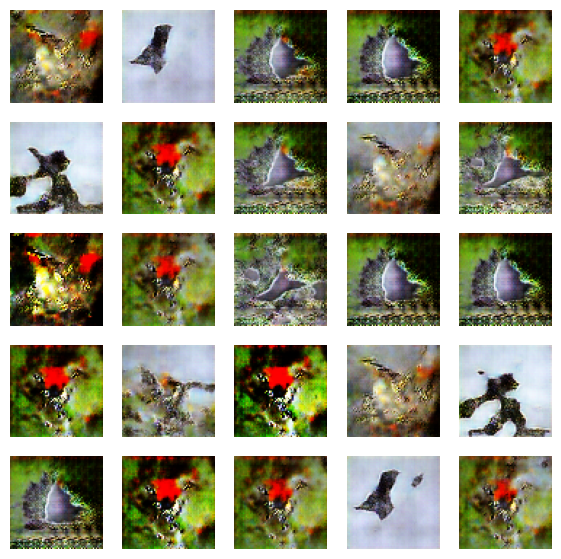

Saving checkpoint for epoch 61 at checkpoint/emb_bert_batnorm/ckpt-7
Time for epoch 61 is 446.53303933143616 sec
Time for epoch 62 is 443.7331192493439 sec
Time for epoch 63 is 423.3688666820526 sec
Time for epoch 64 is 420.5011384487152 sec
Time for epoch 65 is 416.2414650917053 sec
Time for epoch 66 is 439.92895436286926 sec
Time for epoch 67 is 423.75115036964417 sec
Time for epoch 68 is 431.59008407592773 sec
Time for epoch 69 is 434.8040053844452 sec
Time for epoch 70 is 428.9310989379883 sec
D_loss [1.63668573]
G_loss [4.06893873]
D_loss [1.85774314]
G_loss [4.03873253]
D_loss [1.08950245]
G_loss [5.40108204]
D_loss [1.2387619]
G_loss [6.44412708]
D_loss [1.91122341]
G_loss [4.30314]
D_loss [1.28162932]
G_loss [4.41238403]
D_loss [1.77616119]
G_loss [3.47785425]
D_loss [2.04156137]
G_loss [4.25025225]
D_loss [1.59355021]
G_loss [4.12301445]
D_loss [1.39501357]
G_loss [4.02366638]
D_loss [2.69494772]
G_loss [4.31995392]
D_loss [1.16764534]
G_loss [5.83318663]
D_loss [1.2511555]
G_

D_loss [1.70659757]
G_loss [5.39273691]
D_loss [1.47590196]
G_loss [7.22472811]
D_loss [1.86298823]
G_loss [3.34048414]
D_loss [1.82228518]
G_loss [4.27574301]
D_loss [1.39343548]
G_loss [3.97999477]
D_loss [1.59650481]
G_loss [4.39380741]
D_loss [1.63519824]
G_loss [5.60544777]
D_loss [1.6000005]
G_loss [7.54986763]
D_loss [0.578469157]
G_loss [7.16340303]
D_loss [1.57636929]
G_loss [5.91955805]
D_loss [2.36663771]
G_loss [4.44939947]
D_loss [1.97052777]
G_loss [4.31439877]
D_loss [2.43001223]
G_loss [5.0098896]
D_loss [1.21331549]
G_loss [4.43756914]
D_loss [1.51522148]
G_loss [4.89766741]
D_loss [1.93432438]
G_loss [3.73108244]
D_loss [1.59471786]
G_loss [5.11421394]
D_loss [0.774302244]
G_loss [4.77712631]
D_loss [1.71664703]
G_loss [4.49034691]
D_loss [1.32093561]
G_loss [3.14249849]
D_loss [1.64646602]
G_loss [3.20693326]
D_loss [1.3475585]
G_loss [4.33718681]
D_loss [1.23893142]
G_loss [5.80125141]
D_loss [1.3256824]
G_loss [5.60865688]
D_loss [1.45525825]
G_loss [6.790905]
D_lo

D_loss [1.58571672]
G_loss [4.5805397]
D_loss [1.54372048]
G_loss [5.34026814]
D_loss [1.6431911]
G_loss [4.22276592]
D_loss [1.8643353]
G_loss [4.7637]
D_loss [1.75567198]
G_loss [4.96893597]
D_loss [1.70645845]
G_loss [5.04810429]
D_loss [1.33044481]
G_loss [5.44411945]
D_loss [1.42721176]
G_loss [5.06991386]
D_loss [2.13414788]
G_loss [3.95378399]
D_loss [1.50269854]
G_loss [4.63698]
D_loss [1.38597202]
G_loss [4.46888399]
D_loss [2.62117863]
G_loss [2.45353079]
D_loss [1.45970881]
G_loss [4.5874424]
D_loss [1.56225669]
G_loss [3.94631338]
D_loss [1.81769776]
G_loss [5.84713745]
D_loss [1.58302283]
G_loss [5.87004471]
D_loss [1.56814241]
G_loss [3.61005425]
D_loss [1.46355081]
G_loss [4.59140491]
D_loss [1.89392316]
G_loss [4.10651875]
D_loss [1.50768065]
G_loss [4.30560684]
D_loss [2.15156126]
G_loss [5.60785246]
D_loss [1.78325427]
G_loss [5.7461648]
D_loss [1.7888931]
G_loss [5.04046822]
D_loss [1.58136487]
G_loss [5.60994911]
D_loss [1.04780638]
G_loss [5.01902103]
D_loss [2.103

G_loss [4.4446187]
D_loss [1.90623426]
G_loss [4.51188564]
D_loss [1.96635461]
G_loss [3.83810806]
D_loss [0.949857771]
G_loss [4.15955544]
D_loss [1.7523973]
G_loss [4.19137955]
D_loss [1.62402809]
G_loss [4.39479685]
D_loss [1.51840591]
G_loss [4.32083702]
D_loss [1.77185583]
G_loss [4.82653189]
D_loss [1.85445786]
G_loss [4.98418808]
D_loss [1.56795776]
G_loss [4.81112194]
D_loss [1.57235277]
G_loss [5.21101141]
D_loss [2.08399725]
G_loss [4.48422527]
D_loss [1.88163936]
G_loss [4.98586845]
D_loss [1.60031247]
G_loss [5.55701256]
D_loss [1.76091337]
G_loss [6.04088783]
D_loss [1.61095762]
G_loss [4.94607115]
D_loss [1.74010372]
G_loss [4.49497604]
D_loss [1.32641578]
G_loss [3.59213972]
D_loss [1.2447437]
G_loss [5.06913328]
D_loss [1.65446162]
G_loss [4.4723053]
D_loss [1.620031]
G_loss [4.59963894]
D_loss [0.962237179]
G_loss [5.78846931]
D_loss [2.02976704]
G_loss [7.21730232]
D_loss [1.54840863]
G_loss [3.60966396]
D_loss [1.9501915]
G_loss [5.3875742]
D_loss [2.22650576]
G_loss

G_loss [4.02738094]
D_loss [1.29785252]
G_loss [4.11341143]
D_loss [1.20019209]
G_loss [3.57556677]
D_loss [1.4752872]
G_loss [3.7645216]
D_loss [1.73180687]
G_loss [5.23871803]
D_loss [1.63384771]
G_loss [4.86022568]
D_loss [1.54122293]
G_loss [4.34228516]
D_loss [2.10982156]
G_loss [5.56706429]
D_loss [0.894671082]
G_loss [3.87741232]
D_loss [1.27354074]
G_loss [4.32244778]
D_loss [1.96972084]
G_loss [6.46114731]
D_loss [1.11169434]
G_loss [4.32278347]
D_loss [1.48698556]
G_loss [4.97613]
D_loss [2.03700447]
G_loss [4.22389603]
D_loss [1.99352443]
G_loss [3.64520264]
D_loss [1.78180635]
G_loss [5.82732248]
D_loss [1.15561283]
G_loss [4.56128025]
D_loss [0.860530853]
G_loss [5.63556194]
D_loss [1.6493448]
G_loss [2.71769452]
D_loss [1.77509236]
G_loss [4.70073605]
D_loss [1.13202322]
G_loss [5.75930786]
D_loss [2.01377034]
G_loss [5.84629154]
D_loss [1.52278352]
G_loss [4.47483778]
D_loss [1.37212]
G_loss [3.02411699]
D_loss [1.7454617]
G_loss [4.22742033]
D_loss [1.65071213]
G_loss [

D_loss [2.27240419]
G_loss [2.97215414]
D_loss [1.43628049]
G_loss [3.97335601]
D_loss [1.80479717]
G_loss [3.43200207]
D_loss [1.68958616]
G_loss [4.39923525]
D_loss [2.32196569]
G_loss [3.52993035]
D_loss [1.32063675]
G_loss [3.700526]
D_loss [1.74598324]
G_loss [6.52639437]
D_loss [1.38038588]
G_loss [3.95663929]
D_loss [1.44677734]
G_loss [3.16259527]
D_loss [1.51649213]
G_loss [3.57250929]
D_loss [0.686745048]
G_loss [3.94302511]
D_loss [1.95862615]
G_loss [6.59406]
D_loss [2.05141759]
G_loss [4.71528244]
D_loss [2.07781553]
G_loss [3.22261095]
D_loss [1.39860773]
G_loss [4.06003571]
D_loss [1.89174151]
G_loss [5.39462948]
D_loss [1.44470978]
G_loss [3.89676976]
D_loss [1.27970827]
G_loss [4.15925598]
D_loss [1.24337983]
G_loss [5.13804865]
D_loss [1.29753733]
G_loss [4.41357374]
D_loss [2.16676831]
G_loss [5.03485203]
D_loss [2.46374893]
G_loss [3.53261828]
D_loss [1.68595195]
G_loss [4.11188221]
D_loss [1.58898115]
G_loss [3.69682527]
D_loss [1.89527273]
G_loss [3.04269791]
D_lo

D_loss [1.63233936]
G_loss [3.5208621]
D_loss [1.39774823]
G_loss [5.71158123]
D_loss [1.84907699]
G_loss [4.06639051]
D_loss [2.18360043]
G_loss [4.49994373]
D_loss [1.40231347]
G_loss [5.85792351]
D_loss [1.65527582]
G_loss [5.31870842]
D_loss [1.53575337]
G_loss [4.73171043]
D_loss [1.98507965]
G_loss [2.90830231]
D_loss [1.32885623]
G_loss [4.24594593]
D_loss [1.17888629]
G_loss [4.26764345]
D_loss [1.6987139]
G_loss [4.10332155]
D_loss [1.1730336]
G_loss [5.38395071]
D_loss [1.03375256]
G_loss [4.28551149]
D_loss [1.37835717]
G_loss [4.37231112]
D_loss [2.07150459]
G_loss [3.29912472]
D_loss [1.11109209]
G_loss [5.63717937]
D_loss [1.62326717]
G_loss [4.81055164]
D_loss [1.87076163]
G_loss [4.7838521]
D_loss [1.858459]
G_loss [5.87193966]
D_loss [1.57183]
G_loss [5.83739853]
D_loss [1.39984214]
G_loss [3.63094711]
D_loss [2.12767649]
G_loss [3.04108715]
D_loss [1.20410407]
G_loss [4.23181868]
D_loss [2.70743656]
G_loss [6.03622532]
D_loss [1.84756613]
G_loss [3.7506032]
D_loss [2.

G_loss [4.82618427]
D_loss [1.28813612]
G_loss [5.80110645]
D_loss [1.86936855]
G_loss [3.95053053]
D_loss [1.37977099]
G_loss [5.00401354]
D_loss [0.793494582]
G_loss [4.75498056]
D_loss [1.72623539]
G_loss [5.60769415]
D_loss [1.30020058]
G_loss [5.08702183]
D_loss [1.82440674]
G_loss [4.05402946]
D_loss [1.11665118]
G_loss [5.39707232]
D_loss [2.08165669]
G_loss [4.39970303]
D_loss [1.43772483]
G_loss [7.02539206]
D_loss [1.64419985]
G_loss [4.32583237]
D_loss [1.89565063]
G_loss [4.41122913]
D_loss [1.57546163]
G_loss [5.99651432]
D_loss [1.60845852]
G_loss [4.02130032]
D_loss [1.52683258]
G_loss [4.83926678]
D_loss [1.77877]
G_loss [5.27231646]
D_loss [1.45024908]
G_loss [5.1689229]
D_loss [1.61897206]
G_loss [4.80455685]
D_loss [2.07822323]
G_loss [3.86641264]
D_loss [1.87856126]
G_loss [3.62702155]
D_loss [1.84665477]
G_loss [5.22128105]
D_loss [1.44575238]
G_loss [5.50249958]
D_loss [1.62593532]
G_loss [6.17062378]
D_loss [1.63439524]
G_loss [6.22595501]
D_loss [1.55700827]
G_l

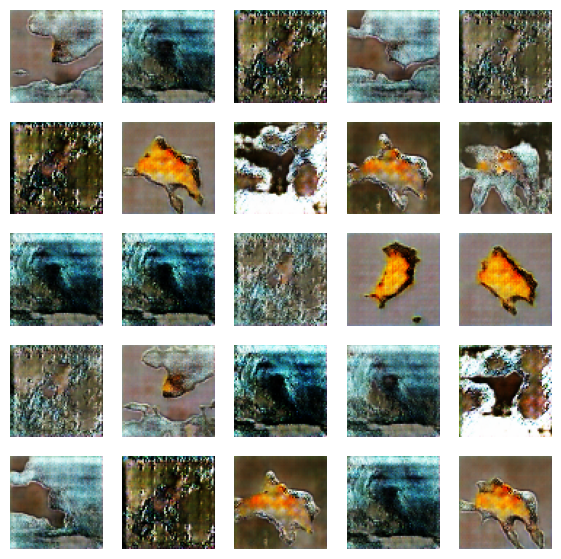

Saving checkpoint for epoch 71 at checkpoint/emb_bert_batnorm/ckpt-8
Time for epoch 71 is 449.52178955078125 sec
Time for epoch 72 is 415.4125473499298 sec
Time for epoch 73 is 459.52911949157715 sec
Time for epoch 74 is 415.9912395477295 sec
Time for epoch 75 is 420.9393517971039 sec
Time for epoch 76 is 441.1780586242676 sec
Time for epoch 77 is 446.49809765815735 sec
Time for epoch 78 is 423.33241415023804 sec
Time for epoch 79 is 443.50977420806885 sec
Time for epoch 80 is 420.79578590393066 sec
D_loss [1.55307055]
G_loss [4.62009525]
D_loss [1.4834007]
G_loss [5.11219311]
D_loss [1.31538963]
G_loss [4.93437958]
D_loss [2.35408735]
G_loss [4.59891796]
D_loss [1.54175448]
G_loss [3.26770449]
D_loss [1.7857058]
G_loss [4.17676544]
D_loss [2.2447865]
G_loss [6.25750303]
D_loss [2.58445048]
G_loss [4.01798248]
D_loss [0.727830052]
G_loss [5.6003561]
D_loss [1.09828305]
G_loss [5.84299564]
D_loss [1.16405439]
G_loss [2.72277212]
D_loss [1.78209114]
G_loss [4.27800226]
D_loss [1.53237939

D_loss [2.23219]
G_loss [4.99365044]
D_loss [1.78655434]
G_loss [4.50988197]
D_loss [0.916716456]
G_loss [4.67099]
D_loss [1.5781163]
G_loss [4.29720545]
D_loss [1.36107445]
G_loss [3.73184323]
D_loss [0.890294671]
G_loss [6.02579784]
D_loss [1.97231472]
G_loss [4.45322275]
D_loss [1.25076604]
G_loss [3.70514536]
D_loss [0.451427847]
G_loss [4.96153545]
D_loss [1.34873569]
G_loss [5.47754478]
D_loss [1.30914533]
G_loss [5.62568]
D_loss [0.71523869]
G_loss [4.54556942]
D_loss [1.81785703]
G_loss [3.22601128]
D_loss [1.39639664]
G_loss [5.94777203]
D_loss [2.00796127]
G_loss [7.27190399]
D_loss [1.26420796]
G_loss [4.85673046]
D_loss [2.22755957]
G_loss [4.12606335]
D_loss [1.73083138]
G_loss [4.06035805]
D_loss [2.18430495]
G_loss [3.66436052]
D_loss [1.14022684]
G_loss [5.12009907]
D_loss [2.09669685]
G_loss [5.09375]
D_loss [1.65943325]
G_loss [5.56225395]
D_loss [2.03041983]
G_loss [4.33879948]
D_loss [2.02376509]
G_loss [4.41429329]
D_loss [1.45089388]
G_loss [4.38224506]
D_loss [1.

D_loss [1.75467622]
G_loss [7.21063042]
D_loss [1.57285392]
G_loss [6.04525185]
D_loss [1.81317759]
G_loss [4.41918898]
D_loss [1.67106211]
G_loss [3.49648046]
D_loss [1.3174454]
G_loss [4.84155273]
D_loss [1.3977623]
G_loss [4.46381092]
D_loss [2.29450703]
G_loss [4.83541775]
D_loss [1.52708876]
G_loss [4.36565733]
D_loss [1.39096498]
G_loss [5.9544878]
D_loss [0.84306848]
G_loss [6.55449772]
D_loss [2.22569394]
G_loss [4.78675318]
D_loss [1.83544695]
G_loss [2.77404785]
D_loss [1.55665803]
G_loss [3.71898079]
D_loss [1.78807187]
G_loss [4.51739788]
D_loss [1.79331529]
G_loss [5.84816217]
D_loss [1.46419919]
G_loss [5.65909433]
D_loss [1.309273]
G_loss [5.29317093]
D_loss [1.84490132]
G_loss [4.83241]
D_loss [1.80618644]
G_loss [5.56563377]
D_loss [2.40458894]
G_loss [4.86273193]
D_loss [1.70520902]
G_loss [5.04951477]
D_loss [1.80033767]
G_loss [4.27053165]
D_loss [1.39658237]
G_loss [4.29390049]
D_loss [1.55502462]
G_loss [4.4543786]
D_loss [1.5997932]
G_loss [4.67118]
D_loss [1.167

D_loss [1.90662706]
G_loss [4.32250261]
D_loss [0.884893417]
G_loss [4.55623817]
D_loss [2.1535759]
G_loss [4.36351299]
D_loss [1.98958516]
G_loss [3.90178585]
D_loss [1.74498725]
G_loss [4.68950081]
D_loss [1.51337731]
G_loss [5.97555256]
D_loss [2.14006495]
G_loss [5.73146772]
D_loss [0.991799057]
G_loss [5.03389549]
D_loss [2.10535574]
G_loss [4.43996239]
D_loss [1.52293205]
G_loss [4.97483492]
D_loss [1.86042213]
G_loss [3.2849462]
D_loss [1.79484284]
G_loss [4.14587402]
D_loss [1.27272177]
G_loss [4.46589661]
D_loss [1.09206247]
G_loss [6.45463371]
D_loss [1.63517749]
G_loss [5.4026103]
D_loss [1.50594687]
G_loss [5.69837093]
D_loss [1.65173352]
G_loss [3.94606113]
D_loss [2.48166728]
G_loss [5.49478579]
D_loss [1.74350762]
G_loss [7.5727272]
D_loss [2.07706118]
G_loss [5.79072809]
D_loss [1.65304708]
G_loss [4.16919279]
D_loss [1.25474858]
G_loss [5.91767168]
D_loss [1.65740514]
G_loss [4.65280247]
D_loss [1.47060704]
G_loss [4.95959187]
D_loss [1.85943604]
G_loss [3.75139785]
D_

G_loss [4.95578098]
D_loss [1.85648751]
G_loss [4.12132597]
D_loss [2.43711734]
G_loss [6.50516844]
D_loss [2.16604328]
G_loss [3.6390686]
D_loss [2.2949791]
G_loss [3.39955]
D_loss [1.86228871]
G_loss [7.90897417]
D_loss [1.91873109]
G_loss [6.4676466]
D_loss [1.20837665]
G_loss [7.15295506]
D_loss [1.80670106]
G_loss [4.68679714]
D_loss [1.88503528]
G_loss [4.4584]
D_loss [1.108953]
G_loss [3.95776558]
D_loss [1.62778831]
G_loss [4.48253441]
D_loss [1.22707176]
G_loss [4.14798498]
D_loss [2.05418301]
G_loss [5.38712072]
D_loss [1.16017389]
G_loss [7.47215319]
D_loss [0.794646323]
G_loss [4.17698479]
D_loss [1.47783375]
G_loss [6.18413544]
D_loss [0.959328175]
G_loss [5.965312]
D_loss [1.60541701]
G_loss [5.32538652]
D_loss [1.90730381]
G_loss [4.50264072]
D_loss [1.51179945]
G_loss [6.62694263]
D_loss [1.31230295]
G_loss [6.31752682]
D_loss [1.28921318]
G_loss [6.17232227]
D_loss [1.54010165]
G_loss [5.74583244]
D_loss [1.89116359]
G_loss [5.07076359]
D_loss [1.1014657]
G_loss [5.288

G_loss [4.24896431]
D_loss [1.62915802]
G_loss [4.24674416]
D_loss [1.85242939]
G_loss [3.6352911]
D_loss [1.64046407]
G_loss [4.60669899]
D_loss [1.97172153]
G_loss [3.76053333]
D_loss [1.15813303]
G_loss [3.0043354]
D_loss [2.02158785]
G_loss [2.88710952]
D_loss [1.43519258]
G_loss [5.77778721]
D_loss [0.975274444]
G_loss [4.99580956]
D_loss [1.65452456]
G_loss [4.56446648]
D_loss [1.44784415]
G_loss [5.66009712]
D_loss [1.32347393]
G_loss [4.84706497]
D_loss [1.41549683]
G_loss [5.12887526]
D_loss [1.64215434]
G_loss [3.13033628]
D_loss [1.26903379]
G_loss [5.76245213]
D_loss [1.26119673]
G_loss [3.87495]
D_loss [1.6509304]
G_loss [2.84850621]
D_loss [1.61963749]
G_loss [3.33056974]
D_loss [1.2173425]
G_loss [6.01927567]
D_loss [1.81748378]
G_loss [6.73244476]
D_loss [1.85960519]
G_loss [4.83590746]
D_loss [1.57233644]
G_loss [3.5886178]
D_loss [1.6000849]
G_loss [3.12245178]
D_loss [1.38368154]
G_loss [4.2796278]
D_loss [1.61680579]
G_loss [4.16743183]
D_loss [1.00517547]
G_loss [3

G_loss [3.03816652]
D_loss [1.92982411]
G_loss [4.06905842]
D_loss [1.68975031]
G_loss [5.06916618]
D_loss [1.27639246]
G_loss [5.35599518]
D_loss [1.39472461]
G_loss [3.36984634]
D_loss [1.84207869]
G_loss [3.74628305]
D_loss [1.33867824]
G_loss [4.555264]
D_loss [1.54131734]
G_loss [3.33525276]
D_loss [1.35182679]
G_loss [5.45787144]
D_loss [3.04114413]
G_loss [7.38440895]
D_loss [1.36528873]
G_loss [5.06524611]
D_loss [0.913330197]
G_loss [5.84263325]
D_loss [1.4529146]
G_loss [4.50798273]
D_loss [1.17163754]
G_loss [4.42348]
D_loss [1.84847498]
G_loss [4.68433428]
D_loss [2.47130728]
G_loss [5.45338]
D_loss [1.07327533]
G_loss [4.17984676]
D_loss [1.31408787]
G_loss [3.59957051]
D_loss [1.98688161]
G_loss [3.43060923]
D_loss [1.97667086]
G_loss [4.06854534]
D_loss [1.21313071]
G_loss [5.11573315]
D_loss [1.69069171]
G_loss [5.63379765]
D_loss [1.69350123]
G_loss [3.5084331]
D_loss [1.5010128]
G_loss [4.4890275]
D_loss [1.60570788]
G_loss [3.88844728]
D_loss [1.72802365]
G_loss [3.5

G_loss [4.22400379]
D_loss [2.01389265]
G_loss [5.8415823]
D_loss [2.31901169]
G_loss [4.27291107]
D_loss [1.55041981]
G_loss [6.32191706]
D_loss [0.7869066]
G_loss [5.2294035]
D_loss [1.78421164]
G_loss [5.04604912]
D_loss [1.17024112]
G_loss [4.23361683]
D_loss [1.73300886]
G_loss [5.51333141]
D_loss [1.67983675]
G_loss [3.41372132]
D_loss [1.88331032]
G_loss [6.99024296]
D_loss [1.27538264]
G_loss [5.75898695]
D_loss [1.61839294]
G_loss [5.37799931]
D_loss [0.844837189]
G_loss [5.98192883]
D_loss [0.523943901]
G_loss [5.32520294]
D_loss [1.5756104]
G_loss [4.96192074]
D_loss [1.72532606]
G_loss [5.44413948]
D_loss [1.38360512]
G_loss [4.75480843]
D_loss [1.01856816]
G_loss [4.94427109]
D_loss [1.72940826]
G_loss [3.54897285]
D_loss [1.75799251]
G_loss [4.96269]
D_loss [1.20682144]
G_loss [5.62421179]
D_loss [1.70682597]
G_loss [5.05668116]
D_loss [1.64275169]
G_loss [6.32592392]
D_loss [0.535917163]
G_loss [4.50207]
D_loss [1.09246588]
G_loss [3.77978]
D_loss [1.5211041]
G_loss [6.0

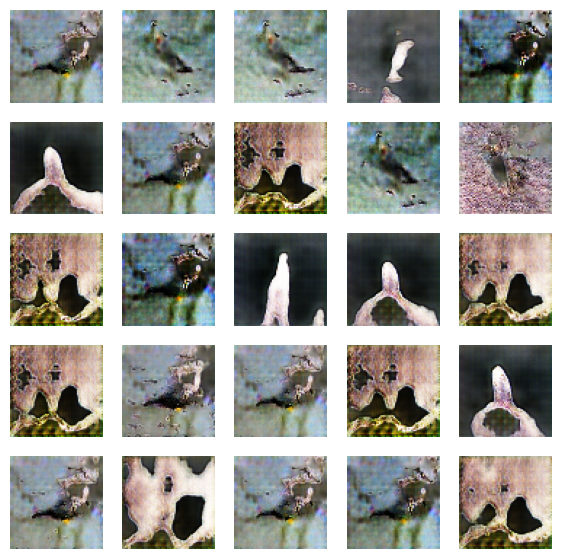

Saving checkpoint for epoch 81 at checkpoint/emb_bert_batnorm/ckpt-9
Time for epoch 81 is 449.2964265346527 sec
Time for epoch 82 is 400.57367181777954 sec
Time for epoch 83 is 404.5708587169647 sec
Time for epoch 84 is 406.50580763816833 sec
Time for epoch 85 is 419.5917398929596 sec
Time for epoch 86 is 433.10757064819336 sec
Time for epoch 87 is 442.16759490966797 sec
Time for epoch 88 is 448.2446413040161 sec
Time for epoch 89 is 437.5917057991028 sec


In [ ]:
ms_loss_weight = 1.0
import tensorflow as tf
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)

discriminator = define_discriminator()
generator = define_generator()

images, lbs = load_data()
BUFFER_SIZE = images.shape[0]
n_batch = 8

train_dataset = tf.data.Dataset.from_tensor_slices((images,lbs)).shuffle(BUFFER_SIZE).batch(n_batch)

train(train_dataset,n_batch,start=22)

In [ ]:
#
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import linspace
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

from numpy.random import randint
import numpy as np

def create_sent_vector(sent):
    sent = [sent]
    text_preprocessed = bert_preprocess_model(sent)
    final = bert_model(text_preprocessed)
    return final['pooled_output'].numpy()
    #result_array = np.empty((0, 300))

  #for word in word_tokenize(sent):
    #result_array = np.append(result_array, [model[word]], axis=0)
  #final = np.mean(result_array, axis=0).astype('float32')
  #return final

def generate_random_word_vectors_from_dataset(n_samples, create_new_captions = False):

  if create_new_captions:
      e = create_sent_vector('This bird has  white breast with brown feathers')
      f = create_sent_vector('This bird has  white breast with blue feathers')
      v = []
      #e.reshape(1,768)
      print(e.shape)
      flag = False
      for i in range(n_samples):
        
        if not flag:
          v.append(f)
          flag = True
        elif flag:
          v.append(e)
          flag = False
      return np.asarray(v), np.asarray([])
  else:
    ix = randint(0,len(captions), n_samples)
    print(ix)
    return  np.asarray(captions)[ix], np.asarray(labels)[ix]

def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[15, 15])
  for i in range(predictions.shape[0]):
      pyplot.subplot(1, 9, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.show()

# Credit to: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/
def interpolate_points(p1, p2, n_steps=9):
	ratios = linspace(0, 1, num=n_steps)
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions]

#gen_model = tf.keras.models.load_model('/content/drive/My Drive/146stage_new_gan_animal_model_120.h5')

for i in range(1):
  generate_images(generator, generate_latent_points(100, 9))
pyplot.show()

In [ ]:
def get_index_by_label(label):
  for idx, l in enumerate(labels):
    if l in label:
      return idx


print(get_index_by_label('Western_Wood_Pewee_0061_795060.jpg'))

In [ ]:
# Show image in image embeddings

pyplot.figure(figsize=[8, 8])

pyplot.subplot(1, 2, 0+1)
pyplot.imshow(array_to_img(image_embeddings[5432]))
pyplot.axis('off')
pyplot.show()

In [ ]:
import tensorflow as tf
#gen_model = tf.keras.models.load_model('models/46stage_new_gan_animal_model_781.h5')

In [ ]:
import numpy as np
def get_random_word_vectors_from_dataset(n_samples,captions):
    ix = np.random.randint(0, len(captions), n_samples)
    return np.asarray(captions)[ix]

In [ ]:
def de7ko(cap):
    f = create_sent_vector(cap)
    v = []
    flag = False
    for i in range(1):    
        v.append(f)
        flag = True
    return np.asarray(v), np.asarray([])

In [ ]:
noise = tf.random.normal((1,100))

In [ ]:
caption = create_sent_vector('This bird is blue')

In [ ]:
print(noise.shape)

In [ ]:
from BertEmbedding import EmbeddingCreator

In [ ]:
emb = EmbeddingCreator()

In [ ]:
cap = emb.createCustomEmbeddings('This bird is blue')

In [ ]:
noise = tf.random.normal((1,100))

In [ ]:
predictions = generator([noise,caption], training=False)

In [ ]:
pyplot.figure(figsize=[2, 2])

pyplot.imshow(array_to_img(predictions.numpy()[0]))
pyplot.axis('off')
pyplot.show()

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
import string

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['a']))

In [ ]:
def make_prediction(cap):
    text = cap
    cap = remove_stopwords(text)
    cap = cap.translate(str.maketrans('','', string.punctuation))
    noise = tf.random.normal((1,100))
    
    caption, _ = de7ko(cap)
    predictions = generator([noise,caption], training=False)
    pyplot.figure(figsize=[5, 5])
    pyplot.imshow(array_to_img(predictions.numpy()[0]))
    pyplot.axis('off')

In [ ]:
def make_prediction_grid(cap):
    pyplot.figure(figsize=[10, 10])

    for i in range(20):
        text = cap
        #cap = remove_stopwords(text)
        #cap = cap.translate(str.maketrans('','', string.punctuation))
        noise = tf.random.normal((1,100))
    
        #caption, _ = de7ko(cap)
        predictions = generator([noise,cap], training=False)
    
        pyplot.subplot(5, 5, i+1)
        pyplot.imshow(array_to_img(predictions.numpy()[0]))
        pyplot.axis('off')
    pyplot.show()

In [ ]:
test = test.reshape(1,768)
make_prediction_grid(test)

In [ ]:
noise, cap = generate_latent_points(100,1)

In [ ]:
tst = []
for i in caps[0]:
    i = abs(i)
    tst.append(str(i))

In [ ]:
mx = max(len(x) for x in tst)

In [ ]:
mx

In [ ]:
cap[0]

In [ ]:
caps = create_sent_vector('this a small bird with fluffy grey feathers and a grey beak.')

In [ ]:
len(test)

In [ ]:
test = []
test = np.array([-8.80453765e-01, -2.30016977e-01,  1.53982677e-02,  7.63145745e-01,
       -1.67636186e-01, -1.12899035e-01,  9.20433581e-01,  2.31789663e-01,
       -1.92173526e-01, -9.99809325e-01, -1.48938507e-01,  5.04856467e-01,
        9.74133551e-01,  2.51672100e-02,  9.12574768e-01, -6.27402663e-01,
       -3.41317058e-01, -5.57229817e-01,  3.86493057e-01, -8.32161784e-01,
        5.95441282e-01,  8.90097916e-01,  4.09509450e-01,  2.50163227e-01,
        3.93467665e-01,  5.93674242e-01, -6.57673061e-01,  9.15036798e-01,
        9.51860309e-01,  7.05915213e-01, -7.49266684e-01,  1.42062679e-01,
       -9.77758586e-01, -2.60669142e-01, -1.55464560e-01, -9.79721069e-01,
        1.93323925e-01, -7.69981802e-01, -9.83245596e-02,  2.95864381e-02,
       -8.72071326e-01,  2.98111081e-01,  9.95922685e-01,  2.26048753e-01,
        9.48943347e-02, -3.52533966e-01, -9.99241948e-01,  2.67680496e-01,
       -8.80547166e-01,  2.29656994e-01,  1.56744406e-01, -3.83794233e-02,
        1.54842883e-01,  4.10892785e-01,  4.32878345e-01,  2.77051806e-01,
       -1.26063168e-01,  1.05151318e-01, -1.20240554e-01, -5.75469494e-01,
       -5.82406163e-01,  3.11504900e-01, -2.16019571e-01, -8.77511382e-01,
        1.88881099e-01, -1.96082413e-01, -9.12517831e-02, -1.99827895e-01,
        7.07085105e-03, -5.99269308e-02,  8.59454513e-01,  1.55581653e-01,
        2.55471617e-01, -7.69784927e-01, -8.00335184e-02,  1.71866283e-01,
       -6.24659777e-01,  9.99961853e-01, -5.86809397e-01, -9.69742000e-01,
       -5.30491509e-02,  3.83228483e-03,  5.26301026e-01,  3.91498595e-01,
       -2.09871814e-01, -9.99847651e-01,  4.50981826e-01, -9.65828672e-02,
       -9.84176159e-01,  1.81323260e-01,  3.74678403e-01, -2.23348811e-01,
       -2.78360933e-01,  4.80318844e-01, -3.10938448e-01, -2.59735644e-01,
       -3.37920517e-01,  8.21603171e-04, -2.34830663e-01, -1.45366967e-01,
        8.19220021e-02, -1.97157651e-01, -6.95125610e-02, -3.61513615e-01,
        2.15650231e-01, -3.76727879e-01, -4.95858014e-01,  2.90638179e-01,
       -2.61082619e-01,  6.50961041e-01,  4.02054161e-01, -2.60238439e-01,
        3.67120296e-01, -9.51097190e-01,  5.91515958e-01, -1.98343113e-01,
       -9.71337318e-01, -5.65517545e-01, -9.80491877e-01,  7.09538043e-01,
       -1.49333894e-01, -1.58831924e-01,  9.45483029e-01,  2.92326093e-01,
        2.65603542e-01, -5.56376502e-02, -1.24673292e-01, -9.99982238e-01,
       -4.98333573e-01, -3.81835163e-01,  1.58755630e-01, -1.43947557e-01,
       -9.65010941e-01, -9.38152313e-01,  5.70341170e-01,  9.40006912e-01,
        1.62885293e-01,  9.92381215e-01, -2.85812289e-01,  9.12721992e-01,
       -1.74228549e-02, -3.11304063e-01, -8.08087736e-02, -3.95101398e-01,
        4.81125981e-01,  5.60868144e-01, -7.57838190e-01,  2.26778656e-01,
       -9.34472904e-02,  3.15034948e-02, -1.74440235e-01, -2.80600965e-01,
       -4.31810282e-02, -9.16801214e-01, -4.28465188e-01,  9.33690965e-01,
        1.69587761e-01, -1.29056215e-01,  5.24189889e-01, -2.63950288e-01,
       -4.53741968e-01,  8.22614193e-01,  4.66421396e-01,  3.39254558e-01,
       -8.45761150e-02,  3.94497246e-01,  3.92881036e-02,  4.73652571e-01,
       -8.50350320e-01,  1.59737349e-01,  3.63531709e-01, -2.73319781e-01,
       -9.77459271e-03, -9.66823697e-01, -3.28776777e-01,  4.89139616e-01,
        9.82344329e-01,  7.43519425e-01,  1.67659357e-01,  2.87553787e-01,
       -1.98833376e-01,  3.36682081e-01, -9.23790514e-01,  9.62900639e-01,
       -2.52083212e-01,  1.93947464e-01,  4.74669129e-01, -1.57359019e-01,
       -8.80155325e-01, -2.85705864e-01,  8.50389242e-01, -1.75189227e-01,
       -8.44866455e-01, -4.01739515e-02, -4.83462155e-01, -3.62090886e-01,
       -5.19712195e-02,  6.22924566e-01, -1.95959553e-01, -3.72283012e-01,
       -9.64309052e-02,  8.78189862e-01,  9.69230950e-01,  7.94695258e-01,
       -2.17274353e-01,  5.83401918e-01, -8.97849441e-01, -4.99798775e-01,
        1.34419411e-01,  2.60206789e-01,  1.61342382e-01,  9.89440918e-01,
       -3.33645530e-02, -1.43169940e-01, -9.05669749e-01, -9.77330387e-01,
        5.21452911e-02, -8.86295915e-01, -5.84830940e-02, -6.78180814e-01,
        3.56054783e-01,  6.64208710e-01,  4.78770360e-02,  3.81819487e-01,
       -9.83062446e-01, -7.61405647e-01,  2.95404553e-01, -3.38265955e-01,
        3.48766744e-01, -1.97353199e-01,  1.09244935e-01,  3.06839556e-01,
       -5.88864446e-01,  8.29047263e-01,  8.68932068e-01,  1.71525925e-01,
       -7.35009491e-01,  8.51148307e-01, -3.25095803e-01,  8.66294026e-01,
       -6.01488590e-01,  9.66577828e-01,  3.54924738e-01,  6.39811277e-01,
       -9.21796322e-01,  1.57003462e-01, -9.12463844e-01, -7.16707259e-02,
       -1.70224771e-01, -4.98019695e-01,  1.44815519e-01,  5.67531586e-01,
        2.87521541e-01,  6.14224195e-01, -5.64075232e-01,  9.94957328e-01,
       -6.29881099e-02, -9.34747159e-01,  5.54220200e-01, -2.11754054e-01,
       -9.77951109e-01,  2.71397412e-01,  2.88977623e-01, -3.89038742e-01,
       -3.91004741e-01, -3.56953144e-01, -9.30561066e-01,  9.18217123e-01,
        1.28633559e-01,  9.86722648e-01,  2.00015992e-01, -9.36000824e-01,
       -3.92773002e-01, -8.75337780e-01, -1.06749311e-01, -7.13189319e-02,
        3.57307464e-01, -1.67331904e-01, -9.38466966e-01,  4.40262258e-01,
        5.06743670e-01,  4.01247531e-01,  2.14894488e-01,  9.93849218e-01,
        9.91616964e-01,  9.65101063e-01,  8.59126866e-01,  8.83121252e-01,
       -8.06268036e-01,  2.92547524e-01,  9.99889493e-01, -6.24044478e-01,
       -9.99511600e-01, -9.25504804e-01, -6.13347590e-01,  4.61226195e-01,
       -9.99978721e-01, -4.35862578e-02, -5.63575774e-02, -9.03630733e-01,
       -1.23193599e-02,  9.65929747e-01,  9.85314488e-01, -9.99925315e-01,
        8.18023086e-01,  9.34401751e-01, -6.25441492e-01,  4.33474094e-01,
       -1.15517735e-01,  9.60539162e-01,  4.20662582e-01,  2.10319638e-01,
       -1.94298044e-01,  2.61679113e-01, -2.90394723e-01, -8.57349575e-01,
        3.76219042e-02,  1.55106738e-01,  5.88076830e-01,  2.07368523e-01,
       -7.28735924e-01, -8.98608923e-01, -2.51970261e-01, -1.01329803e-01,
       -2.15276599e-01, -9.38434422e-01, -1.67465955e-01, -1.88226134e-01,
        7.15597451e-01,  9.98114645e-02,  2.45786130e-01, -7.47976780e-01,
        1.92577228e-01, -3.39228004e-01,  4.36852425e-01,  6.28403664e-01,
       -8.97152483e-01, -7.05661297e-01, -5.60296357e-01, -3.01484793e-01,
        9.85715091e-02, -9.29942667e-01,  9.63285446e-01, -2.89033115e-01,
        2.71024317e-01,  9.99940097e-01, -2.87726194e-01, -8.66553664e-01,
        3.68165404e-01,  2.35099897e-01, -3.89547825e-01,  9.99905884e-01,
        5.68111420e-01, -9.65960324e-01, -5.37417591e-01,  2.14174345e-01,
       -3.69943380e-01, -4.46400106e-01,  9.96882021e-01, -1.75380498e-01,
        3.96185033e-02,  2.15842038e-01,  9.57530499e-01, -9.80891228e-01,
        4.69241440e-01, -9.00335252e-01, -9.46272433e-01,  9.42983091e-01,
        9.25438702e-01, -2.12100297e-01, -6.29902184e-01,  7.66361281e-02,
       -2.10510582e-01,  2.49523237e-01, -9.47067678e-01,  6.87735081e-01,
        5.29013634e-01, -1.82782546e-01,  8.92122090e-01, -9.10025537e-01,
       -5.06010354e-01,  3.63316894e-01, -1.09232731e-01,  2.65939206e-01,
        2.42671907e-01,  4.59666908e-01, -3.23862642e-01,  6.19740076e-02,
       -2.11146951e-01,  1.93632647e-01, -9.56532419e-01,  2.12749362e-01,
        9.99873579e-01,  1.31009445e-01, -2.07210526e-01, -1.89908087e-01,
       -7.35443085e-02, -2.63732821e-01,  2.73128897e-01,  4.32980269e-01,
       -2.25038186e-01, -7.89038599e-01,  4.99954112e-02, -9.32942390e-01,
       -9.73070741e-01,  7.63639569e-01,  1.87113822e-01, -3.09123665e-01,
        9.96837556e-01,  3.05217206e-01,  1.98344052e-01, -1.22368887e-01,
        4.71835315e-01, -1.49252638e-02,  5.69303453e-01, -1.74877137e-01,
        9.61008668e-01, -2.57232845e-01,  5.34489751e-01,  8.43871593e-01,
       -1.16998672e-01, -3.26318592e-01, -6.18683279e-01,  4.58297320e-02,
       -8.90101075e-01, -8.33739787e-02, -9.42334473e-01,  9.50139284e-01,
        4.93264906e-02,  3.24228555e-01,  1.96017206e-01,  9.70596820e-02,
        9.99930620e-01,  3.66374999e-01,  6.45800948e-01, -7.47105300e-01,
        8.90407145e-01, -7.44303763e-01, -7.42500603e-01, -3.09464961e-01,
       -2.08001584e-02, -5.59380976e-03, -2.29554608e-01,  3.11805397e-01,
       -9.66267705e-01,  5.95647022e-02,  2.00326554e-02, -9.74688530e-01,
       -9.84825373e-01,  2.79958844e-01,  7.92584121e-01,  6.14665635e-02,
       -4.73468482e-01, -6.69615269e-01, -5.50240636e-01,  2.80475497e-01,
       -2.22083390e-01, -9.09992814e-01,  3.85517538e-01, -2.18076855e-01,
        5.21199286e-01, -2.35613927e-01,  5.27731359e-01, -9.42211077e-02,
        7.29738057e-01,  4.48837370e-01,  1.50048375e-01, -7.33408034e-02,
       -8.19662750e-01,  8.19707870e-01, -8.41715693e-01, -1.54426724e-01,
       -1.78749129e-01,  9.99975026e-01, -3.81884128e-01,  2.72284001e-01,
        7.30699599e-01,  7.00210214e-01, -1.46290243e-01,  1.99640587e-01,
        2.05114216e-01,  2.06912100e-01,  1.00090228e-01,  8.23383629e-02,
       -8.65192056e-01, -3.20807785e-01,  4.90280867e-01, -2.96179444e-01,
       -1.64008841e-01,  7.83830106e-01,  1.35429958e-02,  1.31176114e-01,
        4.64188419e-02,  1.48278370e-01,  9.98232186e-01, -2.34221742e-01,
       -7.45560676e-02, -5.66452086e-01, -6.33716881e-02, -2.60931760e-01,
       -7.15886235e-01,  9.99623895e-01,  3.24440211e-01, -1.37580052e-01,
       -9.81491208e-01, -6.80922717e-02, -9.14913177e-01,  9.81398284e-01,
        7.72460043e-01, -8.50191236e-01,  4.97678101e-01,  4.87879574e-01,
       -1.21589467e-01,  8.09250772e-01, -2.32000455e-01, -2.31448591e-01,
        6.61229417e-02,  1.42842367e-01,  9.40303802e-01, -4.58441556e-01,
       -9.51286316e-01, -5.73005080e-01,  3.57860029e-01, -9.35118794e-01,
        8.09217632e-01, -5.25421321e-01, -2.04097047e-01, -2.24277765e-01,
        3.01374257e-01,  8.83164704e-01,  9.79141798e-04, -9.64358449e-01,
       -1.50636300e-01,  2.68379785e-02,  9.58737195e-01,  2.08762795e-01,
       -5.48031032e-01, -9.07494605e-01,  5.12077920e-02,  2.67167002e-01,
        4.13111039e-02, -9.11459029e-01,  9.51420367e-01, -9.75990355e-01,
        4.41281319e-01,  9.99710321e-01,  3.27615529e-01, -3.20269793e-01,
        2.63846397e-01, -5.04201055e-01,  1.81749582e-01, -3.26382294e-02,
        5.91295779e-01, -9.36210454e-01, -2.51662672e-01, -1.50325686e-01,
        2.69483179e-01, -2.11471453e-01,  3.76247942e-01,  6.07654274e-01,
        1.54238224e-01, -5.12871802e-01, -5.40481269e-01, -1.29259616e-01,
        3.58465165e-01,  7.96124995e-01, -2.40997508e-01, -2.07180575e-01,
        1.55750290e-01, -1.75655827e-01, -8.90735269e-01, -2.09824160e-01,
       -2.80681968e-01, -9.39359665e-01,  6.33977294e-01, -9.99955714e-01,
       -1.73266545e-01, -3.48771453e-01, -2.24385709e-01,  7.88768709e-01,
       -1.77228540e-01, -7.27730617e-02, -6.98809505e-01,  2.56371815e-02,
        7.01412201e-01,  7.18198836e-01, -2.75954813e-01, -1.80623353e-01,
       -7.42104530e-01,  2.32816353e-01, -1.13577075e-01,  1.72238290e-01,
       -1.36176959e-01,  6.97673619e-01, -1.46991074e-01,  9.99978900e-01,
        9.71630067e-02, -5.48564017e-01, -9.68859196e-01,  2.92616487e-01,
       -3.06941569e-01,  9.94913995e-01, -9.16791737e-01, -9.30493832e-01,
        2.88737655e-01, -4.94466901e-01, -7.91192114e-01,  1.90008670e-01,
        9.14912485e-03, -6.41962051e-01, -4.21003878e-01,  9.42713678e-01,
        9.04021978e-01, -4.68821436e-01,  2.69322962e-01, -2.79315233e-01,
       -5.00710785e-01,  1.01603508e-01, -4.87051345e-02,  9.79506493e-01,
        2.08938256e-01,  8.91744256e-01,  7.99809575e-01,  1.69496655e-01,
        9.37966049e-01,  2.08653599e-01,  7.03873873e-01,  1.63692415e-01,
        9.99683499e-01,  2.81126201e-01, -9.28109169e-01,  1.48453116e-01,
       -9.75879550e-01, -1.97389424e-01, -9.44519937e-01,  1.80196792e-01,
        1.27985194e-01,  8.55853677e-01, -3.29258949e-01,  9.48341012e-01,
        9.38111544e-02,  5.37090153e-02, -2.21780598e-01,  2.84623384e-01,
        3.46308172e-01, -8.96481156e-01, -9.77293611e-01, -9.81208324e-01,
        3.60633641e-01, -4.39885557e-01, -2.60915589e-02,  2.72721320e-01,
        1.53825805e-01,  3.34862500e-01,  3.46766174e-01, -9.99401927e-01,
        9.10004377e-01,  4.43370312e-01,  7.86779746e-02,  9.47284698e-01,
        2.11832806e-01,  2.03621015e-01,  2.64423519e-01, -9.80728507e-01,
       -9.57503676e-01, -3.13907266e-01, -1.99346349e-01,  8.31723213e-01,
        6.09730542e-01,  8.24902654e-01,  3.71506691e-01, -5.12145579e-01,
       -6.30896613e-02,  3.52403000e-02,  2.25418568e-01, -9.86407340e-01,
        3.62513870e-01,  5.49599342e-02, -9.66617763e-01,  9.44864154e-01,
       -4.76719141e-01, -2.71122605e-01,  5.44964194e-01,  1.03836574e-01,
        9.46267307e-01,  7.58386254e-01,  5.42973876e-01,  8.02935362e-02,
        5.07375717e-01,  8.79801810e-01,  9.42357302e-01,  9.83257651e-01,
       -1.65411681e-01,  7.80230641e-01,  7.37127513e-02,  2.78799653e-01,
        2.96888411e-01, -9.23079848e-01,  1.19074188e-01, -6.59916596e-03,
       -2.21848860e-01,  2.73883551e-01, -2.47740015e-01, -9.53292549e-01,
        5.25448501e-01, -2.35435039e-01,  5.36641955e-01, -3.35360944e-01,
        8.12037811e-02, -4.35863644e-01, -3.00284624e-01, -7.30468512e-01,
       -5.43703556e-01,  5.77575803e-01,  5.00675678e-01,  9.09688711e-01,
        1.23378135e-01, -6.24788217e-02, -6.85352683e-01, -9.68594849e-02,
        2.42555253e-02, -9.14372027e-01,  9.27561104e-01, -8.59253630e-02,
        2.84658521e-01, -1.58948433e-02, -1.19637903e-02,  4.12023872e-01,
       -2.42120147e-01, -3.44680429e-01, -2.60558099e-01, -7.65620589e-01,
        8.20428491e-01, -1.29452050e-02, -4.92897272e-01, -5.63740015e-01,
        6.20155632e-01,  3.01663429e-01,  8.89944553e-01, -6.23011310e-03,
       -1.11036368e-01, -8.12215433e-02, -1.26108110e-01,  2.46278808e-01,
       -4.15876418e-01, -9.99392748e-01,  4.07713711e-01,  7.98859298e-02,
       -1.52374543e-02, -3.07587594e-01,  1.46168573e-02, -1.76984966e-01,
       -9.72682118e-01, -1.63437232e-01, -1.54282555e-01,  1.13290377e-01,
       -5.26515543e-01, -4.79574978e-01,  5.20585597e-01,  2.39529848e-01,
        4.00757641e-01,  8.69178474e-01, -2.06473187e-01,  4.61310953e-01,
        6.24356449e-01,  9.50849205e-02, -5.81183493e-01,  8.87356818e-01])


In [ ]:
caps[0]

In [ ]:
caps = create_sent_vector('This bird is blue')

In [ ]:
caption.shape

In [ ]:
import matplotlib.pyplot as plt
plt.hist(caps[0])
plt.show()

In [ ]:
plt.hist(cap[0])
plt.show()

#### 

In [ ]:
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions , s]


In [ ]:
def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]

In [ ]:
while True:
    noise, cap , s  = generate_latent_points(100,1)
    if (s=='Crested_Auklet_0029_1824.jpg' ):
        print('found!!')
        break

In [ ]:
cap[0]